In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
def split_data(data):
    np.random.seed(42)
    train,test = train_test_split(data,test_size=0.2,random_state=0)
    return train,test
def split_data_(data_x,data_y):
    
    X_train,y_train,X_test,y_test = train_test_split(data_x,data_y,test_size=0.2,random_state=0)
    return X_train,y_train,X_test,y_test

def split_test_train(train,test):
    y_train = train["satisfaction"]
    y_test = test["satisfaction"]
    X_train=train.drop("satisfaction",axis=1)
    X_test=test.drop("satisfaction",axis=1)
    return X_train,y_train,X_test,y_test
#minMax scaller or withot MinMax scaller
def split_test_train_specific_feature(features,target,data_train,data_test):
    X_train = data_train[features]
    y_train = data_train[target].to_numpy()
    X_test = data_test[features]
    y_test = data_test[target].to_numpy()
    return X_train,y_train,X_test,y_test    

In [5]:
def split_data_X_Y(data):
    data_y= data["satisfaction"]
    Data_x=data.drop("satisfaction",axis=1)
    return Data_x,data_y

In [6]:
def load_DataSet(name,tsv):
    dataset=pd.read_csv(name,sep="\,")    
    return dataset

In [7]:
def drop_column(column,data):
    data.drop(columns = [column],axis=1,inplace=True)
    return data
    

In [8]:
def precision_recall_curve_(model):
    y_scores_m1 =model.decision_function(X_test)
    precision_m1, recall_m1, thresholds_m1 = precision_recall_curve(y_test, y_scores_m1)
    closest_zero_m1 = np.argmin(np.abs(thresholds_m1))
    closest_zero_p_m1 = precision[closest_zero_m1]
    closest_zero_r_m1 = recall[closest_zero_m1]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision_m1, recall_m1, label='Precision-Recall Curve_m1',c='r')
    plt.plot(closest_zero_p_m1, closest_zero_r_m1, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)


    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

In [9]:
def roc_curv_two(model_1,model_2,X_test,y_test):
    model_1_Probs = model_1.predict_proba(X_test)[:, 1]
    model_2_Probs = model_2.predict_proba(X_test)[:, 1]
    
    fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, model_1_Probs)
    fprDt, tprDt, thresholdsDt = metrics.roc_curve(y_test, model_2_Probs)
    
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.plot(fprLR, tprLR, label = "model_1")
    axes.plot(fprDt, tprDt, label = "model_2")
    
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("model_1,model_2")
    axes.legend()
    print('AUC of  model_1:', metrics.auc(fprLR, tprLR))
    print('AUC of  model_2:', metrics.auc(fprDt, tprDt))
    
def roc_curv_one(model_1,X_test,y_test):
    model_1_Probs = model_1.predict_proba(X_test)[:, 1]
    fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, model_1_Probs)
    
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.plot(fprLR, tprLR, label = "model_1")
    
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("model_1")
    axes.legend()
    print('AUC of  model_1:', metrics.auc(fprLR, tprLR))
     
    

In [10]:
def roc_curv_three(model_1,model_2,model_3,X_test,y_test):
    model_1_Probs = model_1.predict_proba(X_test)[:, 1]
    model_2_Probs = model_2.predict_proba(X_test)[:, 1]
    model_3_Probs = model_3.predict_proba(X_test)[:, 1]
    
    fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, model_1_Probs)
    fprDt, tprDt, thresholdsDt = metrics.roc_curve(y_test, model_2_Probs)
    fprDt_3, tprDt_3, thresholdsDt_3 = metrics.roc_curve(y_test, model_3_Probs)
    
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.plot(fprLR, tprLR, label = "model_1")
    axes.plot(fprDt, tprDt, label = "model_2")
    axes.plot(fprDt_3, tprDt_3, label = "model_3")
    
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("model_1,model_2,model_3")
    axes.legend()
    print('AUC of  model_1:', metrics.auc(fprLR, tprLR))
    print('AUC of  model_2:', metrics.auc(fprDt, tprDt))
    print('AUC of  model_3:', metrics.auc(fprDt_3, tprDt_3))
    
def roc_curv_four(model_1,model_2,model_3,model_4,X_test,y_test):
    model_1_Probs = model_1.predict_proba(X_test)[:, 1]
    model_2_Probs = model_2.predict_proba(X_test)[:, 1]
    model_3_Probs = model_3.predict_proba(X_test)[:, 1]
    model_4_Probs = model_4.predict_proba(X_test)[:, 1]
    
    
    fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, model_1_Probs)
    fprDt, tprDt, thresholdsDt = metrics.roc_curve(y_test, model_2_Probs)
    fprDt_3, tprDt_3, thresholdsDt_3 = metrics.roc_curve(y_test, model_3_Probs)
    fprDt_4, tprDt_4, thresholdsDt_4 = metrics.roc_curve(y_test, model_4_Probs)
    
    
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.plot(fprLR, tprLR, label = "model_1")
    axes.plot(fprDt, tprDt, label = "model_2")
    axes.plot(fprDt_3, tprDt_3, label = "model_3")
    axes.plot(fprDt_4, tprDt_4, label = "model_4")
    
    
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("model_1,model_2,model_3,model_4")
    axes.legend()
    print('AUC of  model_1:', metrics.auc(fprLR, tprLR))
    print('AUC of  model_2:', metrics.auc(fprDt, tprDt))
    print('AUC of  model_3:', metrics.auc(fprDt_3, tprDt_3))
    print('AUC of  model_4:', metrics.auc(fprDt_4, tprDt_4))
    
    
    
def roc_curv_all(model_1,model_2,model_3,model_4,model_5,X_test,y_test):
    model_1_Probs = model_1.predict_proba(X_test)[:, 1]
    model_2_Probs = model_2.predict_proba(X_test)[:, 1]
    model_3_Probs = model_3.predict_proba(X_test)[:, 1]
    model_4_Probs = model_4.predict_proba(X_test)[:, 1]
    model_5_Probs = model_5.predict_proba(X_test)[:, 1]
    
    fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, model_1_Probs)
    fprDt, tprDt, thresholdsDt = metrics.roc_curve(y_test, model_2_Probs)
    fprDt_3, tprDt_3, thresholdsDt_3 = metrics.roc_curve(y_test, model_3_Probs)
    fprDt_4, tprDt_4, thresholdsDt_4 = metrics.roc_curve(y_test, model_4_Probs)
    fprDt_5, tprDt_5, thresholdsDt_5 = metrics.roc_curve(y_test, model_5_Probs)
    
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.plot(fprLR, tprLR, label = "model_1")
    axes.plot(fprDt, tprDt, label = "model_2")
    axes.plot(fprDt_3, tprDt_3, label = "model_3")
    axes.plot(fprDt_4, tprDt_4, label = "model_4")
    axes.plot(fprDt_5, tprDt_5, label = "model_5")
    
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("model_1,model_2,model_3,model_4,model_5")
    axes.legend()
    print('AUC of  model_1:', metrics.auc(fprLR, tprLR))
    print('AUC of  model_2:', metrics.auc(fprDt, tprDt))
    print('AUC of  model_3:', metrics.auc(fprDt_3, tprDt_3))
    print('AUC of  model_4:', metrics.auc(fprDt_4, tprDt_4))
    print('AUC of  model_5:', metrics.auc(fprDt_5, tprDt_5))
        

In [11]:
def fill_null(data):
    data = data.fillna(0)
    return data
def fill_null_mean(data):
    data = data.fillna(data.mean())
    # Imputing missing value with mean
    #data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(data['Arrival_Delay_in_Minutes'].mean())
    
    return data

In [12]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [13]:
# Replace spaces in the column names with underscore
def Replace_spaces(data):
    data.columns = [c.replace(' ', '_') for c in data.columns]
    return data

def replace_cat_class(data):
    data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    return data


In [14]:
def check_imbelance(data):
    print(data["satisfaction"].value_counts())
    fig = plt.figure(figsize = (8,5))
    data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
    plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
    plt.show()

In [112]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #accuracy = accuracy_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    #roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Time taken = {}".format(time_taken))
    #print("Accuracy = {}".format(accuracy))
    print('Accuracy on the training subset: {:.3f}'.format(model.score(X_train, y_train)))
    print('Accuracy on the test subset: {:.3f}'.format(accuracy))
    print("_____________report________________\n")
    print(classification_report(y_test,y_pred))
    #print("ROC Area under Curve = {}".format(roc_auc))
    print("_____________ confusion_matrix________________\n")
    confusion = confusion_matrix(y_test, y_pred)
    print_cm(confusion,["disatified_or_natural","satisfied"])
    #plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    #plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, time_taken

In [113]:
airline_dataset=load_DataSet('airline_category.csv',tsv="\,")

In [114]:
airline_dataset.head(5)
#115000

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [115]:
airline_dataset_cleaned=airline_dataset.copy()

In [116]:
drop_column("id",airline_dataset_cleaned)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115302,Female,Loyal Customer,29,Business travel,Business,2864,5,5,5,5,...,3,5,5,5,3,5,3,0,0.0,satisfied
115303,Male,Loyal Customer,51,Business travel,Business,2296,3,3,3,3,...,5,5,5,5,3,5,3,2,0.0,satisfied
115304,Male,Loyal Customer,52,Business travel,Business,280,3,3,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
115305,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied


In [117]:
#airline_dataset_cleaned.hist(bins=50, figsize=(20,15))

In [118]:
airline_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115307 entries, 0 to 115306
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             115307 non-null  object 
 1   Customer Type                      115307 non-null  object 
 2   Age                                115307 non-null  int64  
 3   Type of Travel                     115307 non-null  object 
 4   Class                              115307 non-null  object 
 5   Flight Distance                    115307 non-null  int64  
 6   Inflight wifi service              115307 non-null  int64  
 7   Departure/Arrival time convenient  115307 non-null  int64  
 8   Ease of Online booking             115307 non-null  int64  
 9   Gate location                      115307 non-null  int64  
 10  Food and drink                     115307 non-null  int64  
 11  Online boarding                    1153

In [119]:
# Replace spaces in the column names with underscore
Replace_spaces(airline_dataset_cleaned)
replace_cat_class(airline_dataset_cleaned)
airline_dataset_cleaned.head(2)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0


0    58879
1    56428
Name: satisfaction, dtype: int64


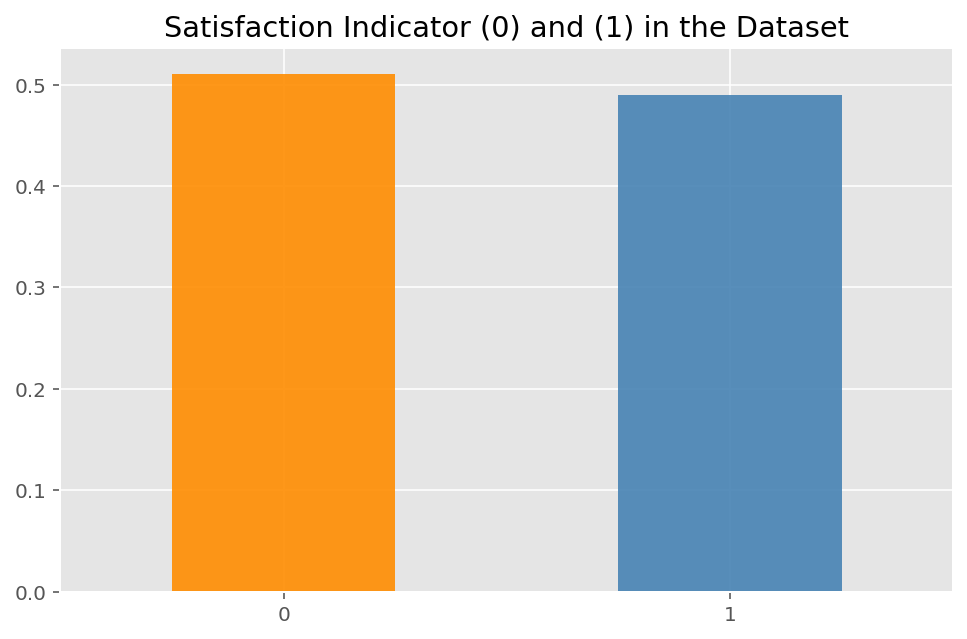

In [120]:
check_imbelance(airline_dataset_cleaned)

### handling missing value

In [121]:
# fill_null_mean(airline_dataset_cleaned)
# print()

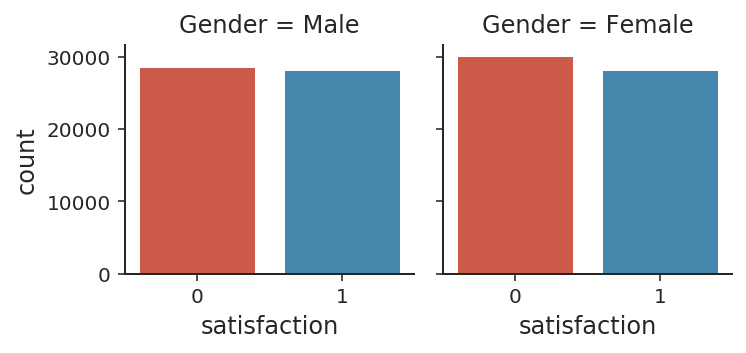

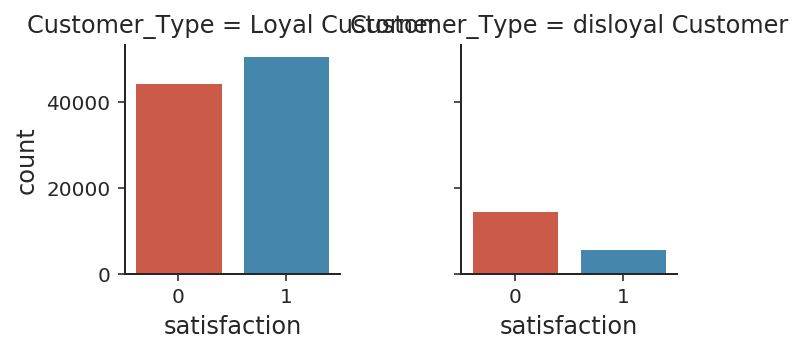

In [122]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=1.0)

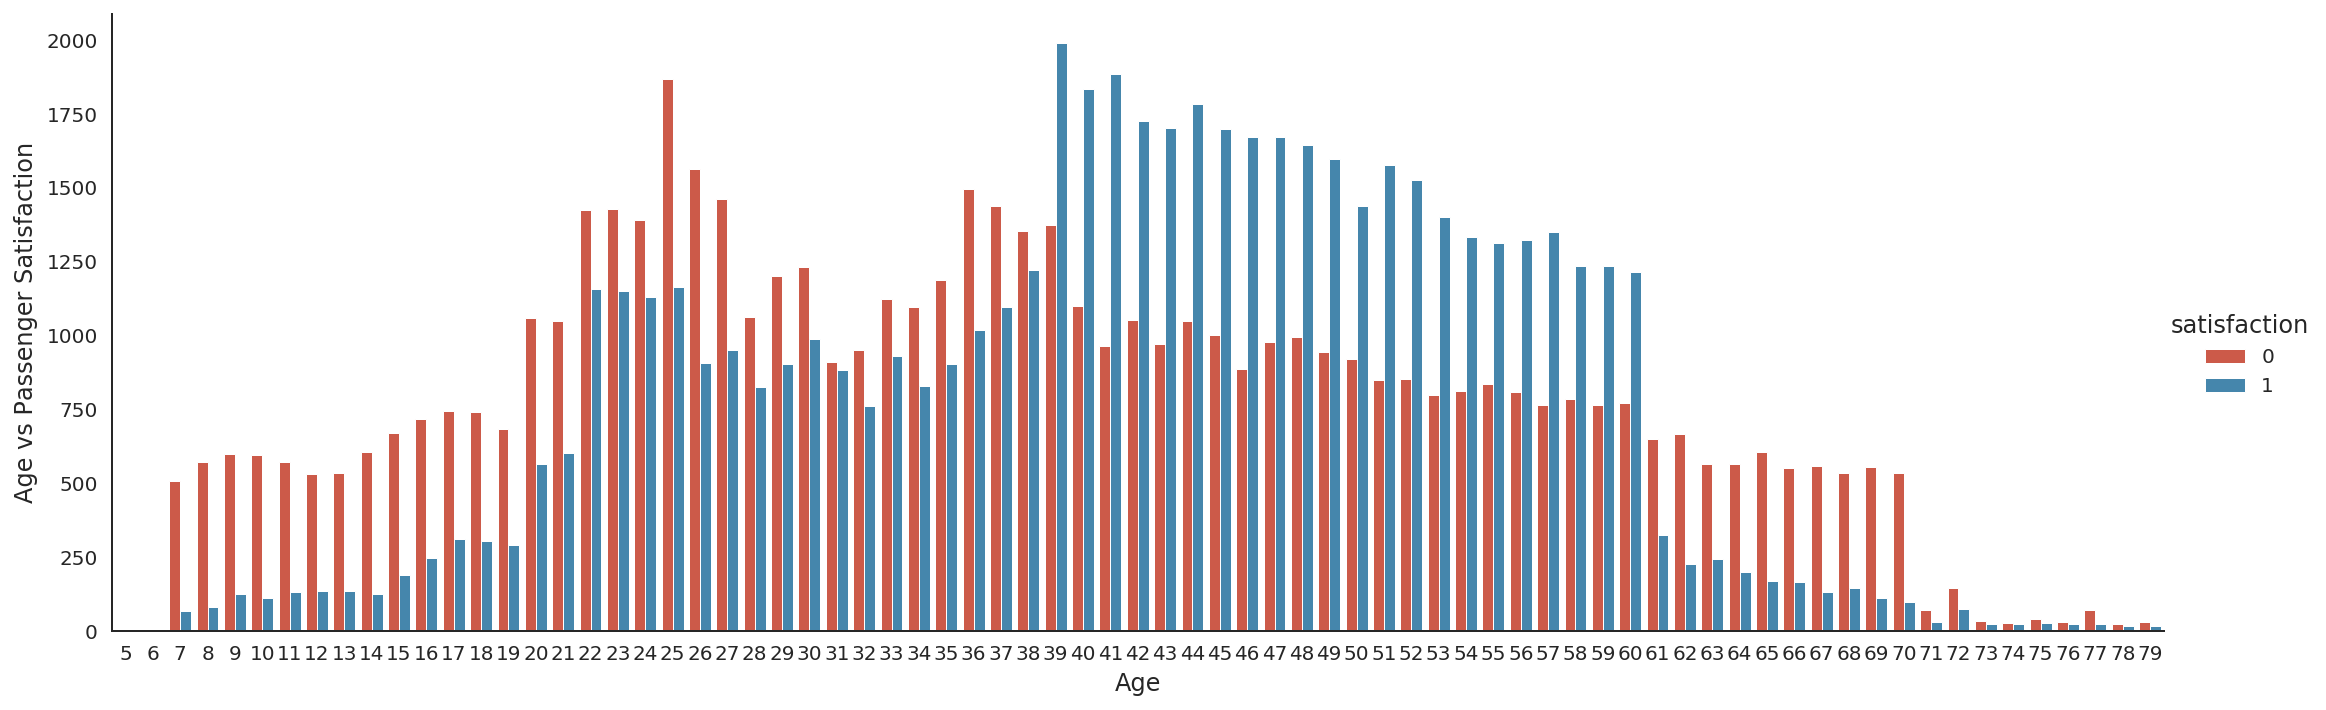

In [123]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=airline_dataset_cleaned, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

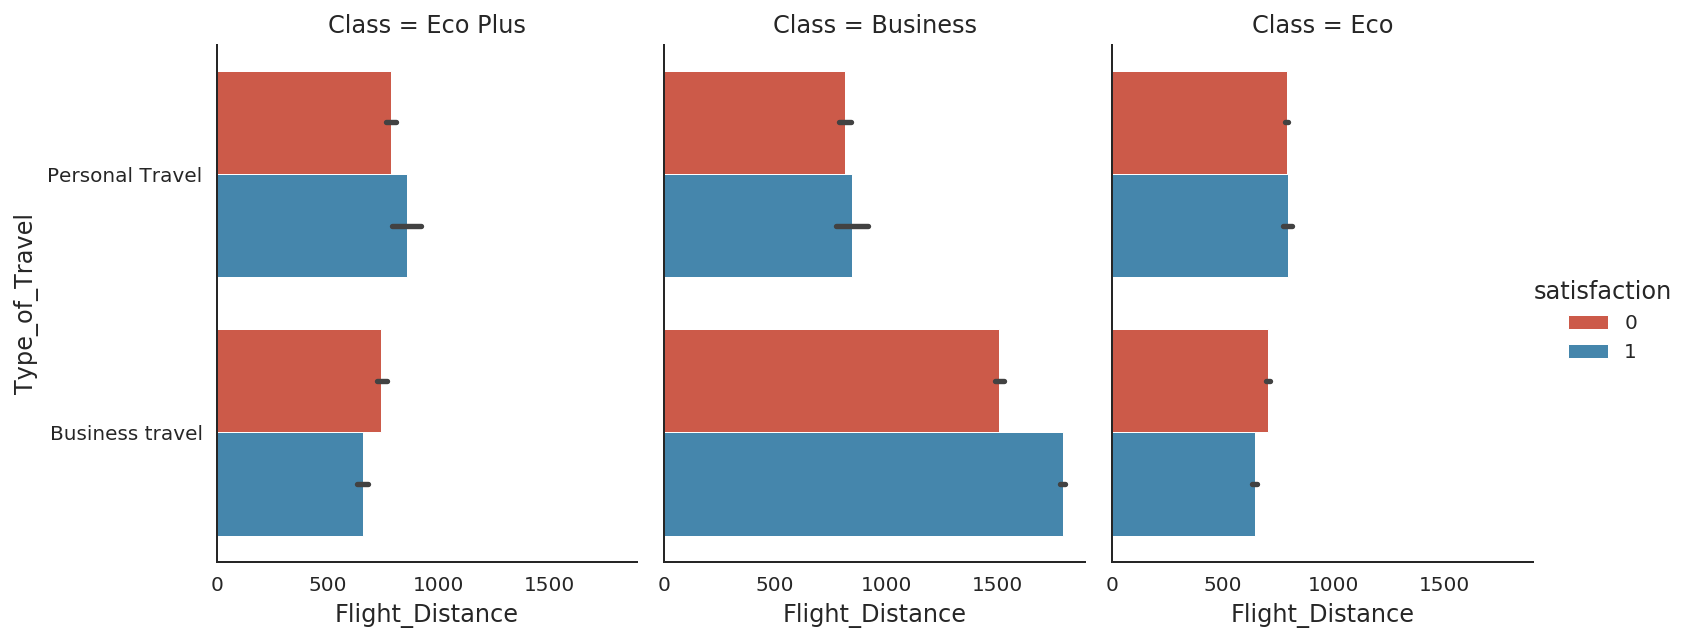

In [124]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=airline_dataset_cleaned, kind="bar", height=4.5, aspect=.8)

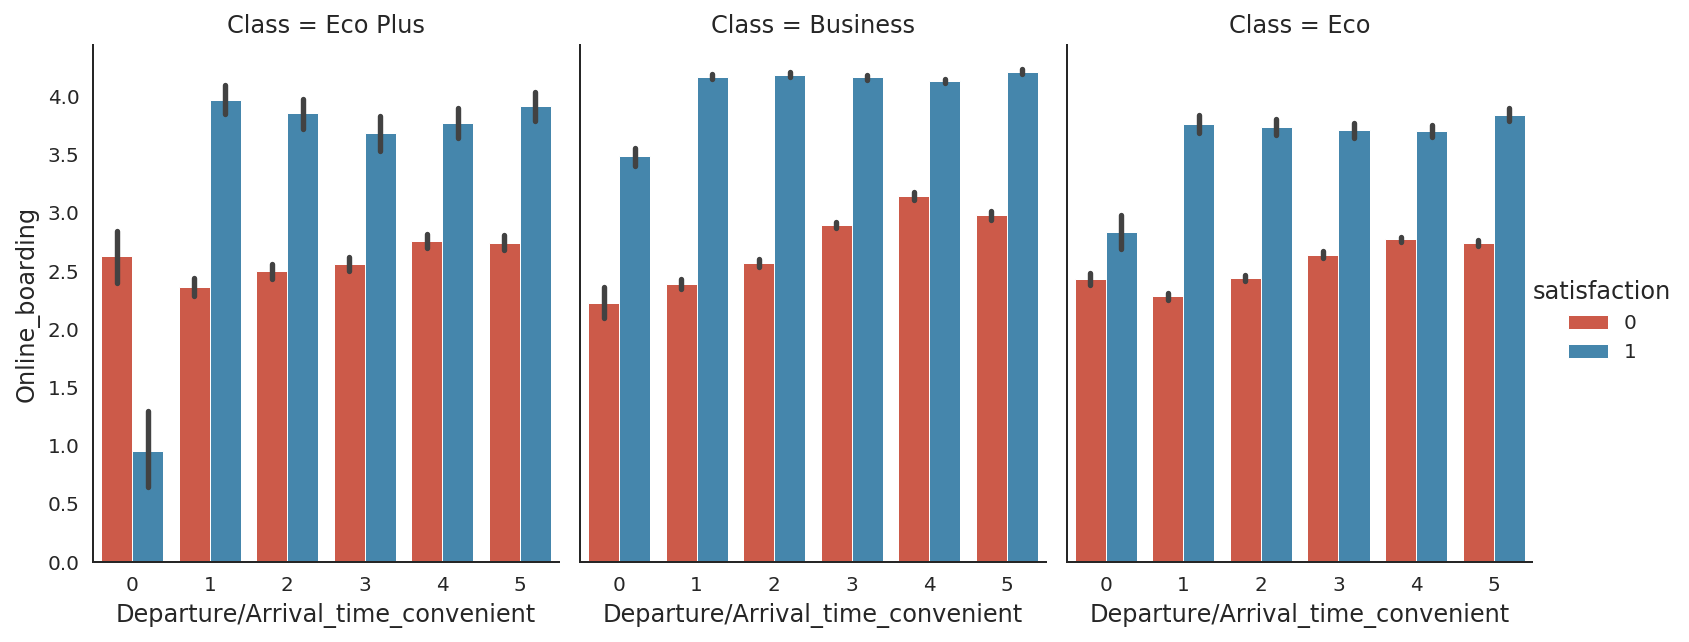

In [125]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=airline_dataset_cleaned, kind="bar", height=4.5, aspect=.8)

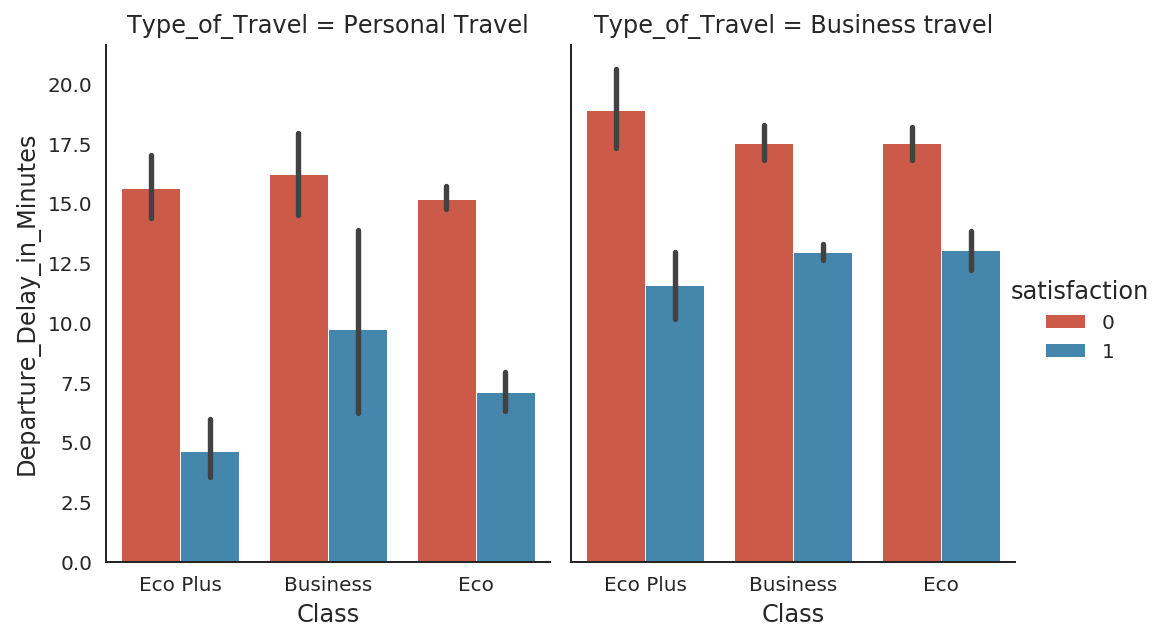

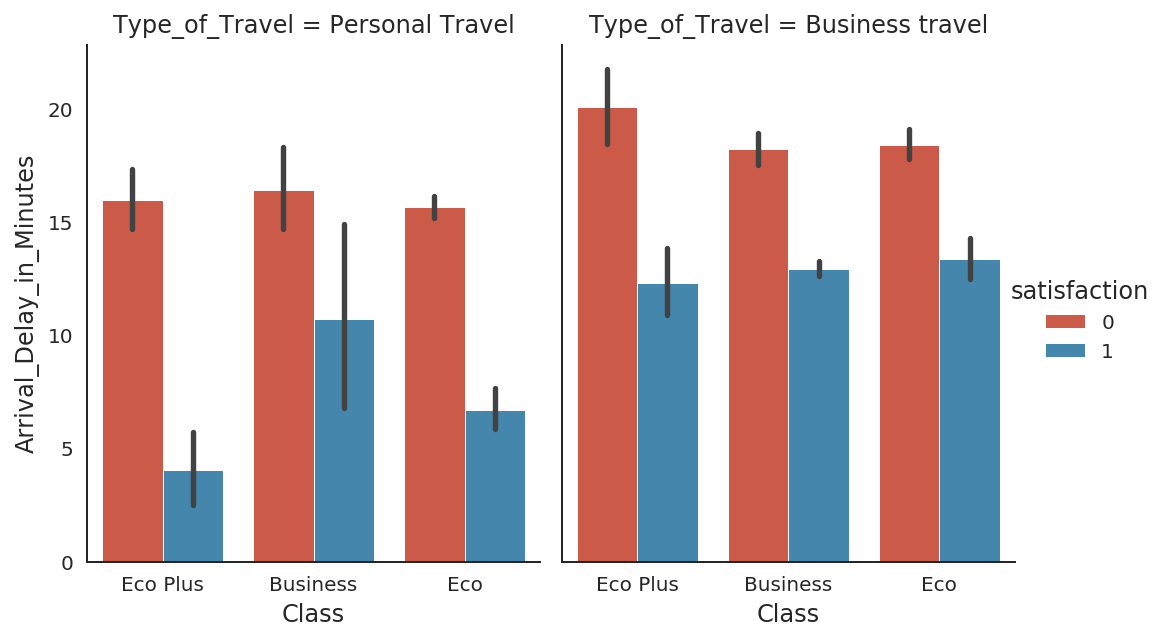

In [126]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=airline_dataset_cleaned, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=airline_dataset_cleaned, kind="bar", height=4.5, aspect=.8)

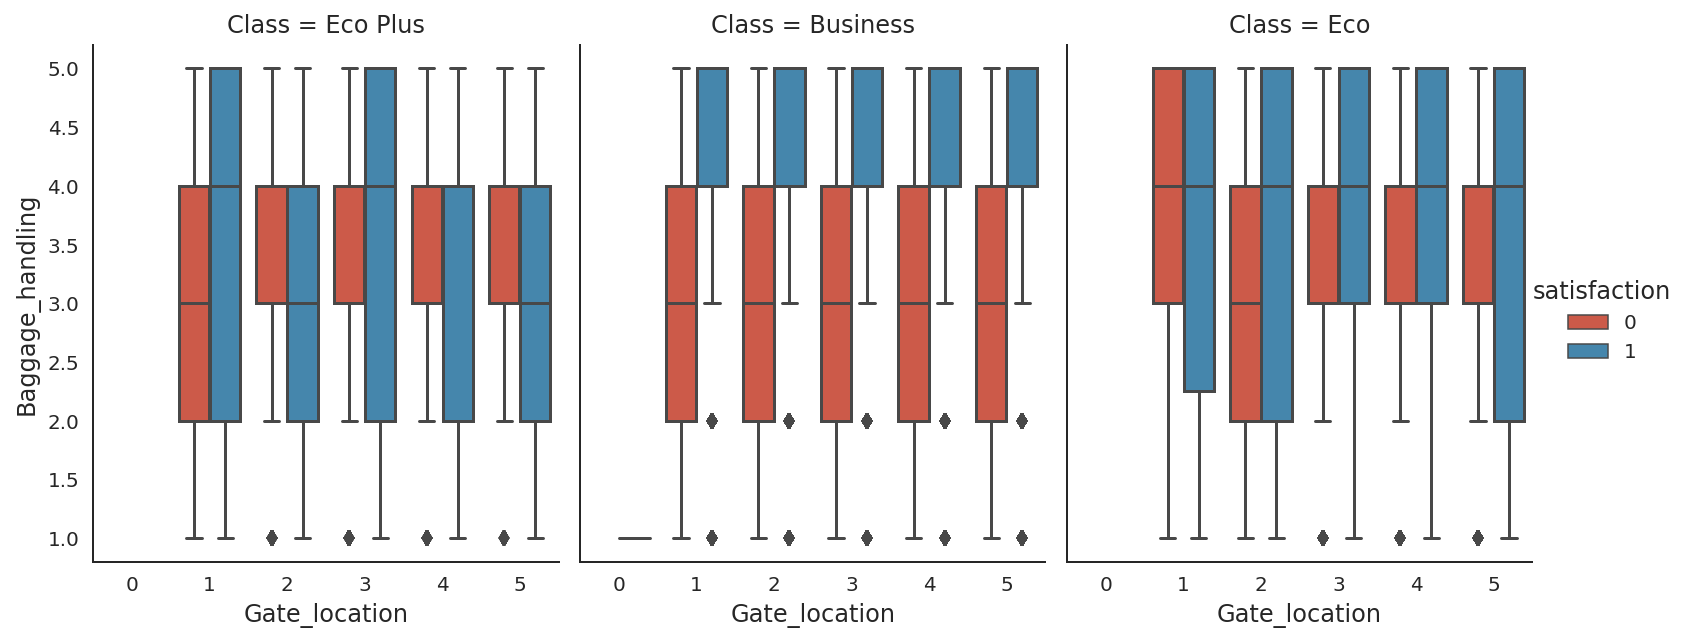

In [127]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=airline_dataset_cleaned, kind="box", height=4.5, aspect=.8)

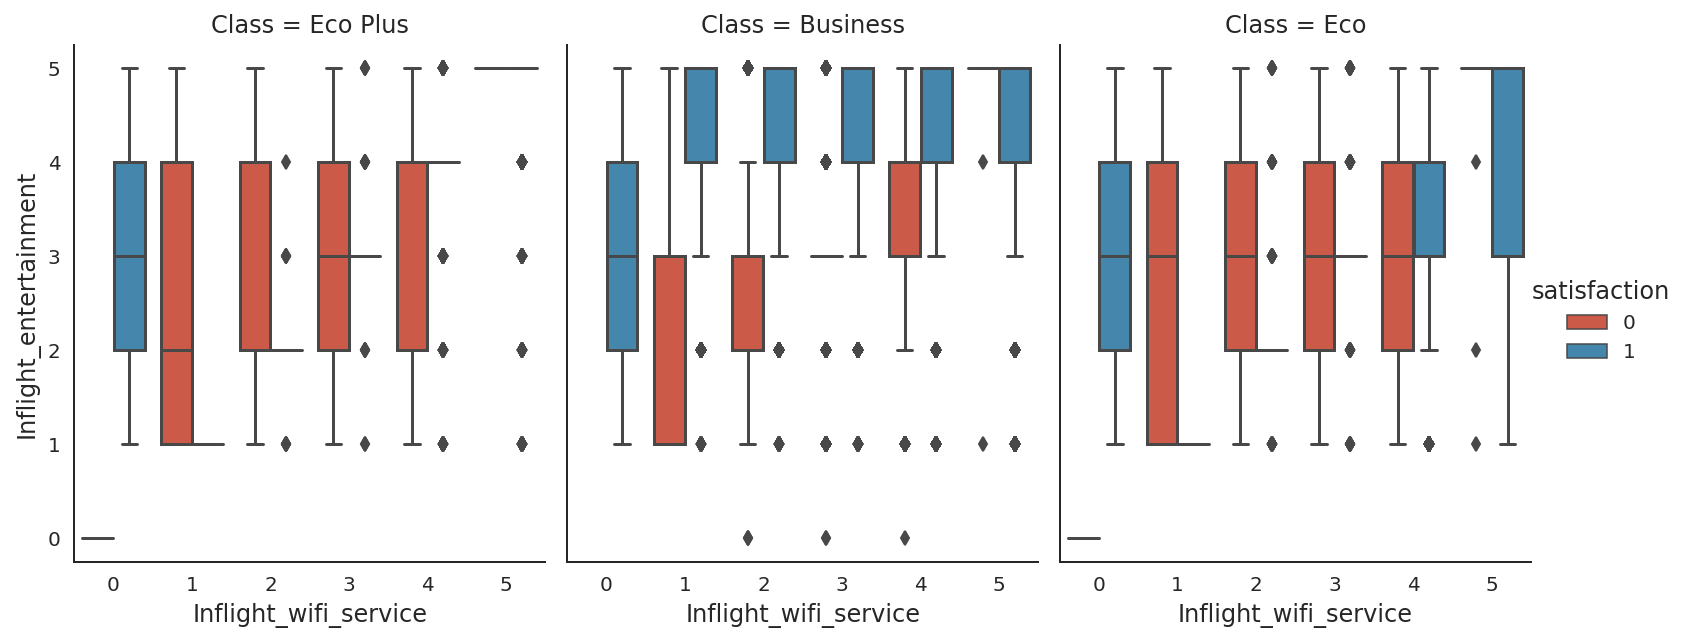

In [128]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=airline_dataset_cleaned, kind="box", height=4.5, aspect=.8)

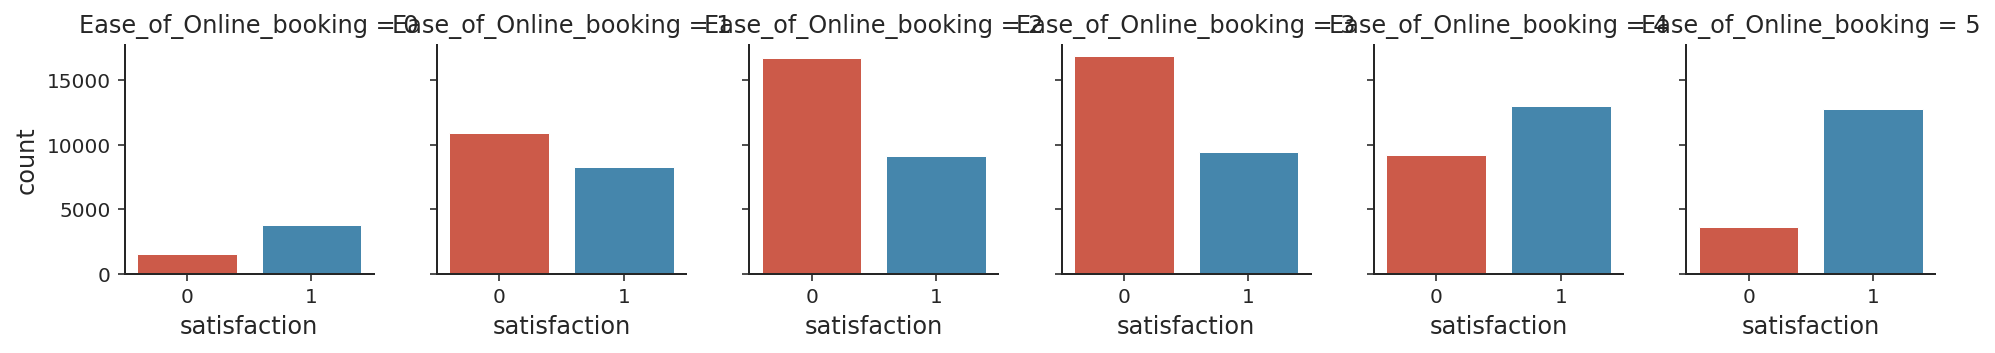

In [129]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=.9)

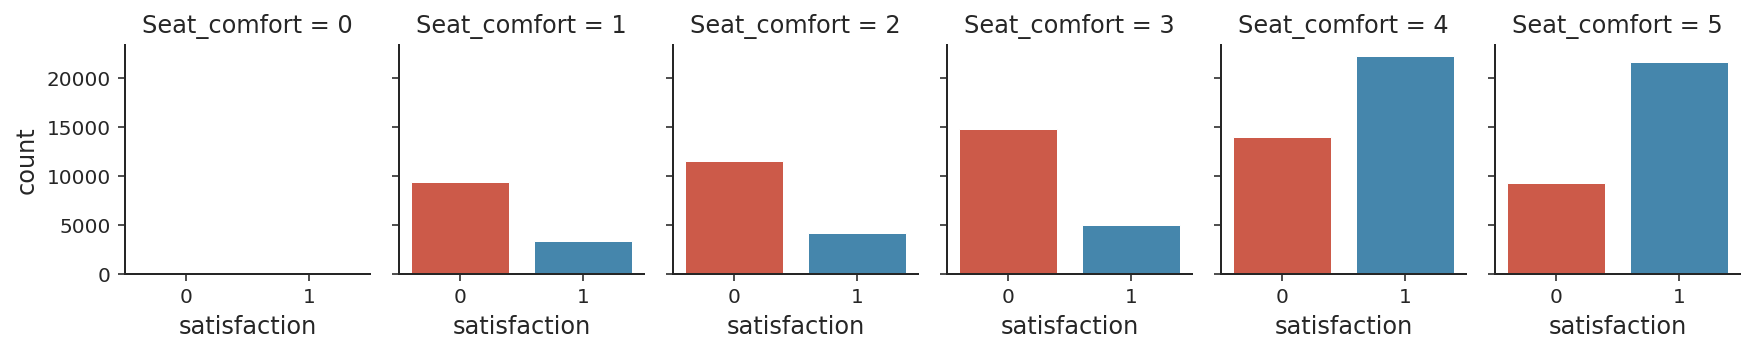

In [130]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=.8)

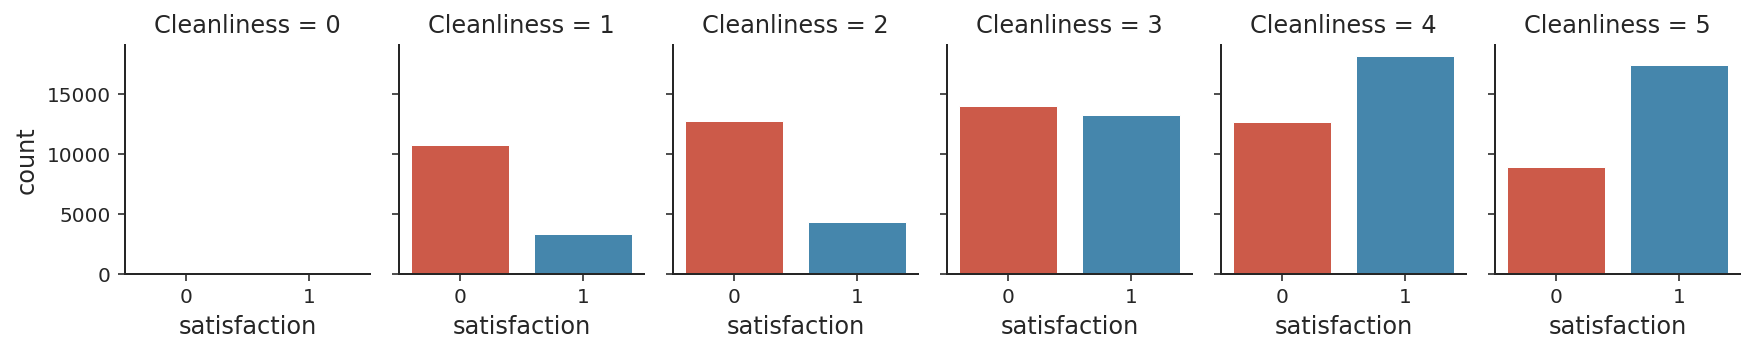

In [131]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=.8)

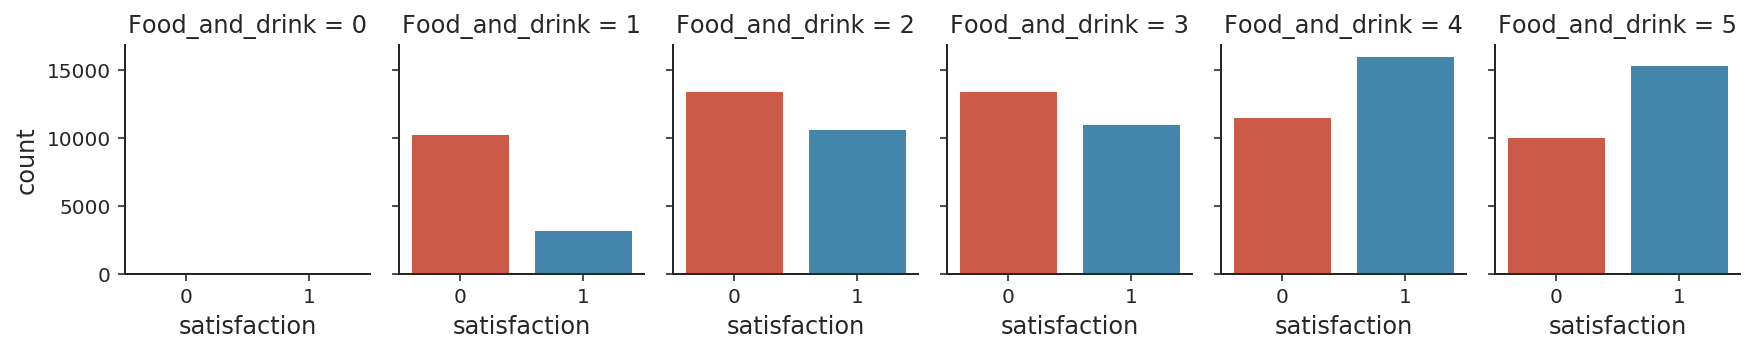

In [132]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=airline_dataset_cleaned, kind="count", height=2.5, aspect=.8)

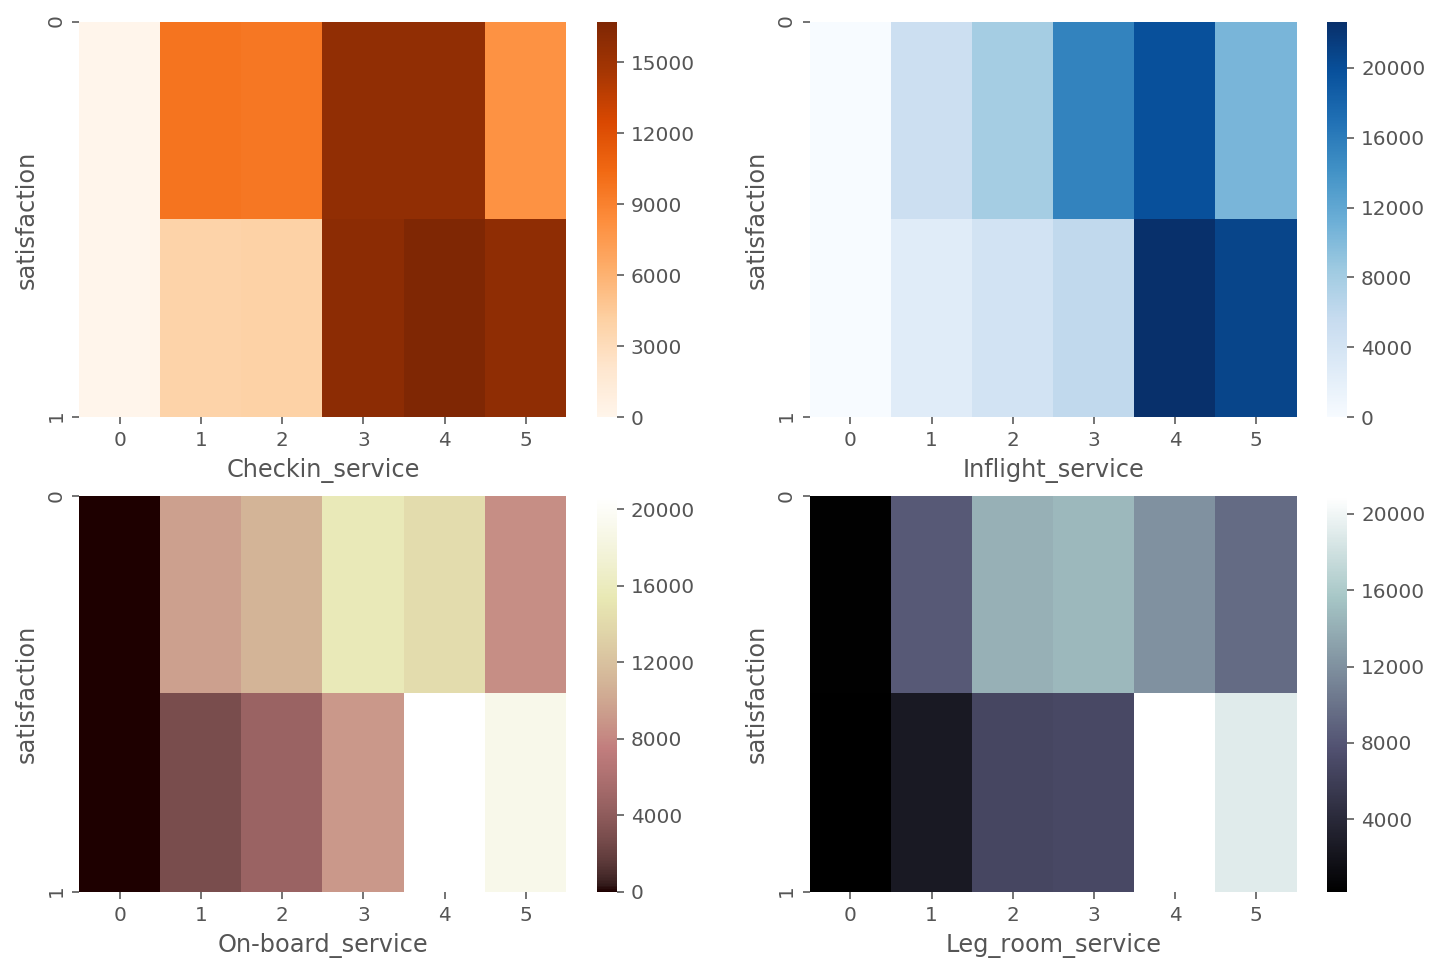

In [133]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(airline_dataset_cleaned['satisfaction'], airline_dataset_cleaned['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(airline_dataset_cleaned['satisfaction'], airline_dataset_cleaned['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(airline_dataset_cleaned['satisfaction'], airline_dataset_cleaned['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(airline_dataset_cleaned['satisfaction'], airline_dataset_cleaned['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

### label encoder

In [136]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
    lencoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        lencoders[col] = LabelEncoder()
        data[col] = lencoders[col].fit_transform(data[col])
    return data    

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
def oneHoteEncoder(data):
    num_df=pd.DataFrame()
    num_cols = ["Age" , "Flight_Distance" ,"Departure_Delay_in_Minutes" , "Arrival_Delay_in_Minutes"]
    for i in num_cols:
        num_df[i]=data[:][i]
    mms = MinMaxScaler()
    num_df = pd.DataFrame(mms.fit_transform(data[num_cols]) , columns=num_cols)    
    cat_cols = list(set(data.columns).difference(set(num_cols)))
    ohe = OneHotEncoder(drop="first")
    cat_df = pd.DataFrame(ohe.fit_transform(data[cat_cols]).todense() , columns=ohe.get_feature_names(cat_cols))
    return cat_df,num_df

In [138]:
def split_fill_null(data):
    data=fill_null_mean(data)
    train,test=split_data(data)
    X_train,y_train,X_test,y_test=split_test_train(train,test)
    return X_train,y_train,X_test,y_test

In [139]:
Data_x,Data_y=split_data_X_Y(airline_dataset_cleaned)

In [140]:
cat_df,num_df=oneHoteEncoder(Data_x)

In [141]:
Data_x_oneHotEncoder = cat_df.join(num_df)

In [142]:
Data_x_oneHotEncoder.head(2)

,Leg_room_service_1,Leg_room_service_2,Leg_room_service_3,Leg_room_service_4,Leg_room_service_5,Online_boarding_1,Online_boarding_2,Online_boarding_3,Online_boarding_4,Online_boarding_5,...,Inflight_entertainment_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.076923,0.086632,0.015704,0.011364
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.230769,0.041195,0.000628,0.003788


In [143]:
airline_dataset_cleaned_HotEmcoder=Data_x_oneHotEncoder


In [144]:
airline_dataset_cleaned_HotEmcoder["satisfaction"]=airline_dataset_cleaned["satisfaction"]

In [145]:
airline_dataset_cleaned_HotEmcoder.head(2)

,Leg_room_service_1,Leg_room_service_2,Leg_room_service_3,Leg_room_service_4,Leg_room_service_5,Online_boarding_1,Online_boarding_2,Online_boarding_3,Online_boarding_4,Online_boarding_5,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.076923,0.086632,0.015704,0.011364,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.230769,0.041195,0.000628,0.003788,0


### outlaiers

In [146]:
# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [147]:
# # Removing outliers from dataset
# train_noOutLaiers = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
# train_noOutLaiers.shape

In [148]:
# train_noOutLaiers["Customer_Type"].value_counts()

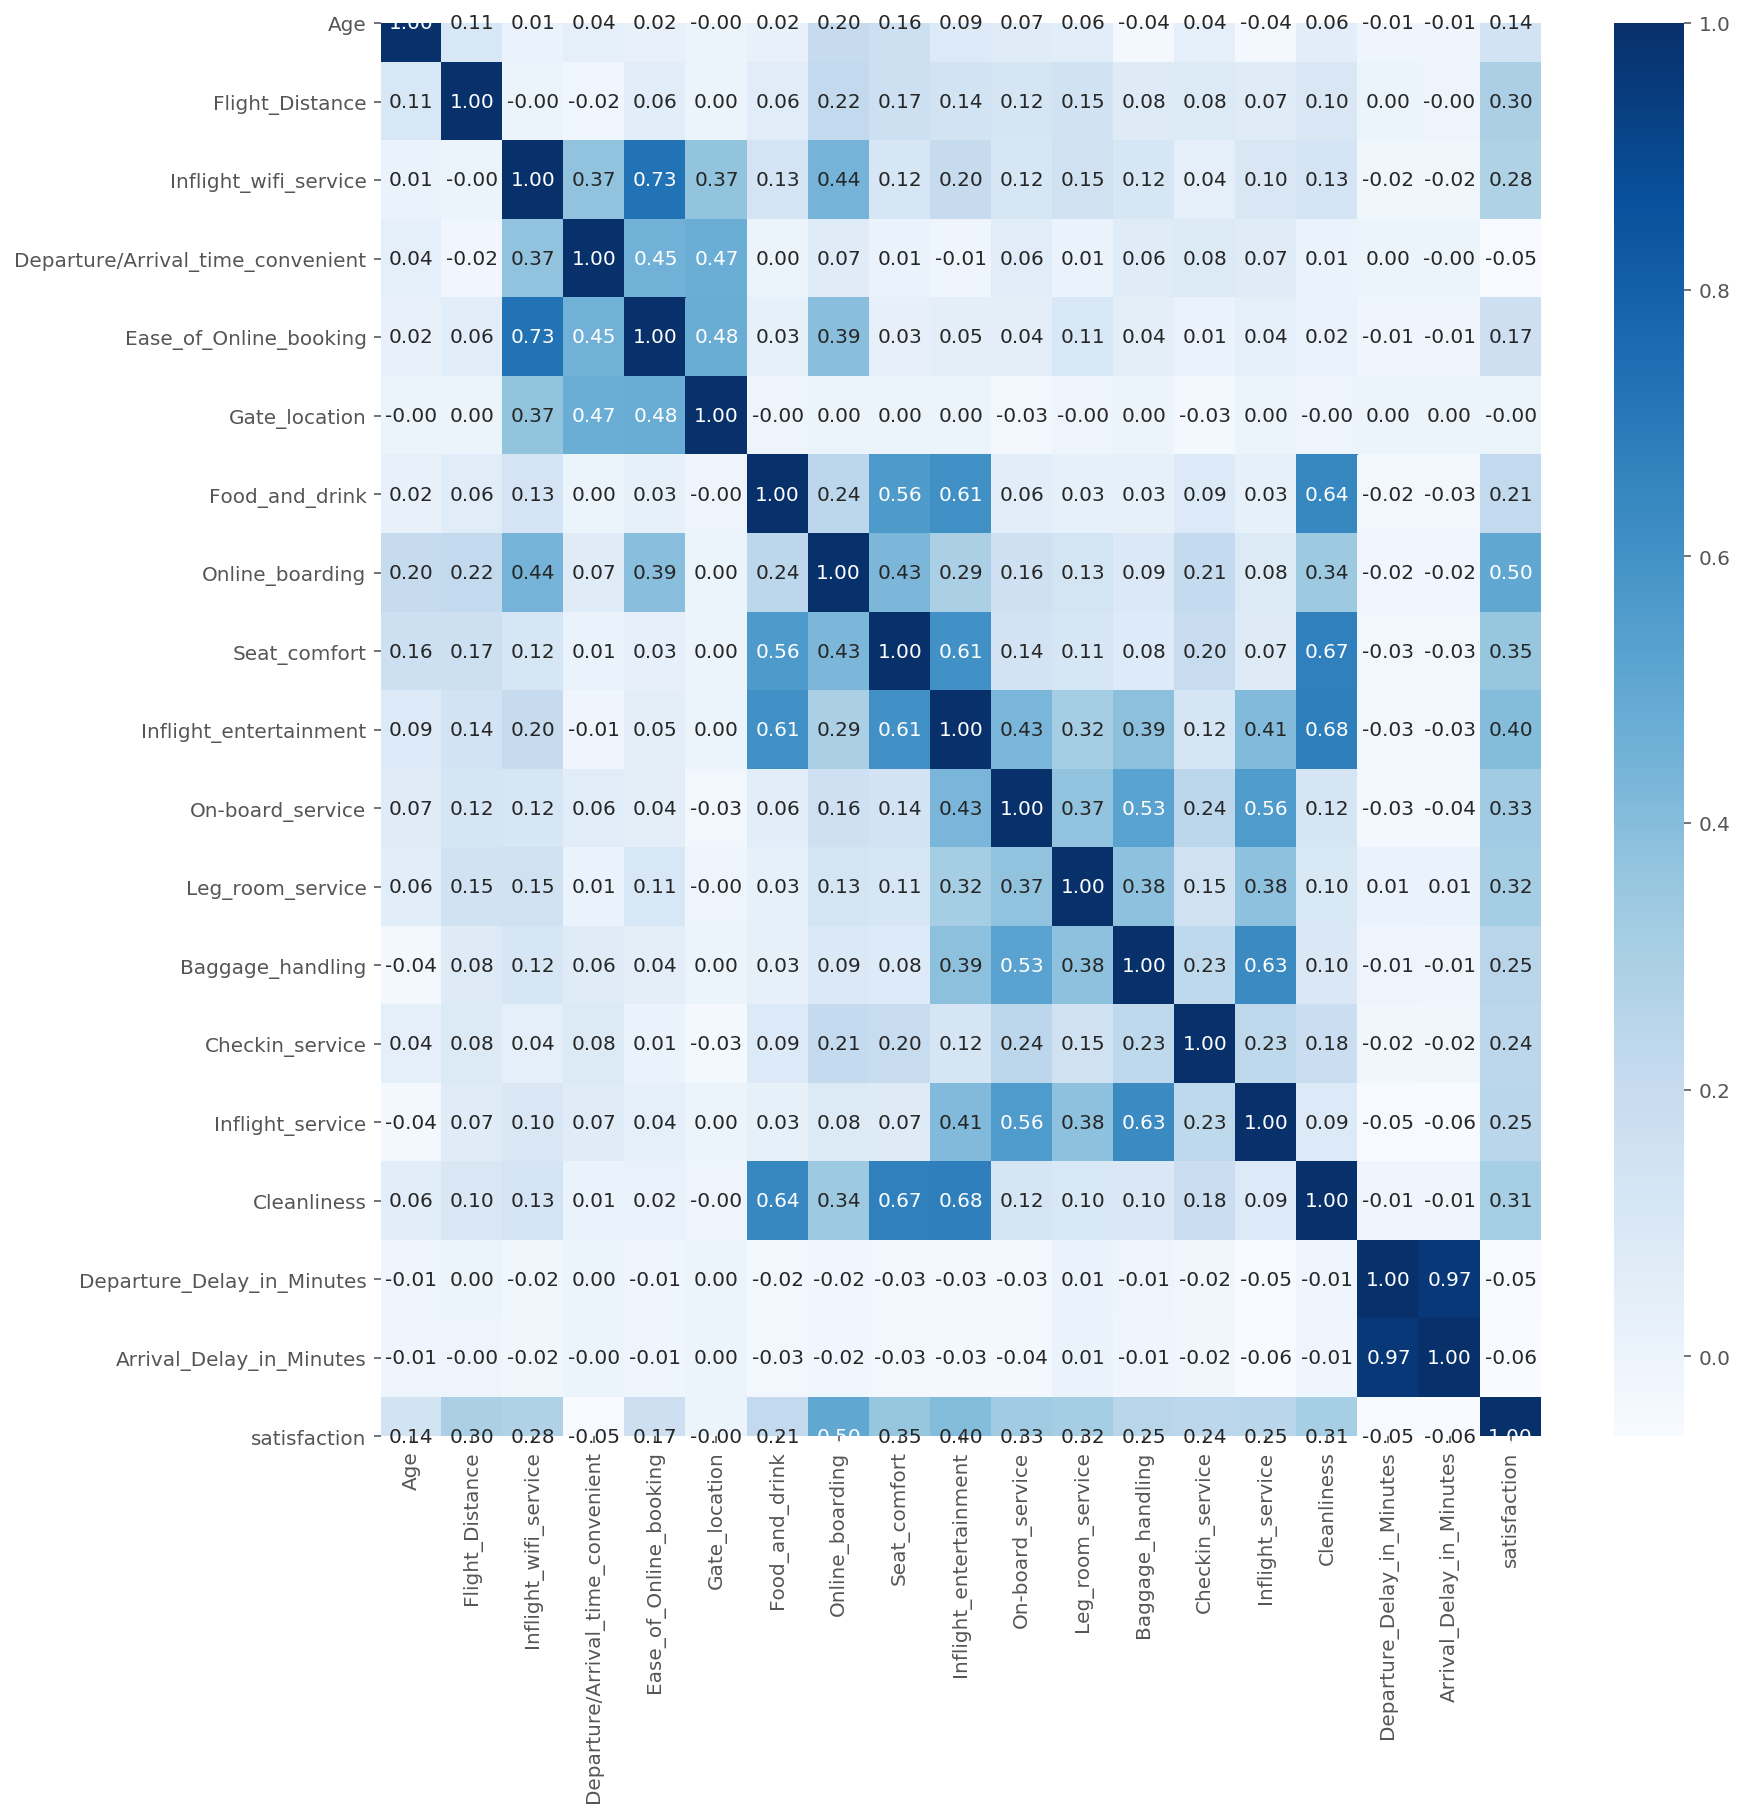

In [149]:
plt.figure(figsize=(13,13))
sns.heatmap(airline_dataset_cleaned.corr(), cmap = 'Blues', annot=True, fmt=".2f")

In [150]:
# corr = train.corr()
# mask = np.triu(np.ones_like(corr, dtype=np.bool))
# f, ax = plt.subplots(figsize=(20, 20))
# cmap = sns.diverging_palette(150.0, 1.0, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

### minMaxScaler

In [151]:
from sklearn import preprocessing
def minMaxScaller_allData(train,test):
    r_scaler = preprocessing.MinMaxScaler()
    r_scaler.fit(train)
    #modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
    modified_data_train_scaller = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
    modified_data_test_scaller = pd.DataFrame(r_scaler.transform(test), columns=train.columns)
    return modified_data_train_scaller,modified_data_test_scaller
    #modified_data_train.head()
def minMaxScaller(X_train,X_test):
    r_scaler = preprocessing.MinMaxScaler()
    r_scaler.fit(X_train)
    modified_data_train_scaller = r_scaler.transform(X_train)
    modified_data_test_scaller = r_scaler.transform(X_test)
    return modified_data_train_scaller,modified_data_test_scaller
    #modified_data_train.head()    

In [152]:
def standardScaller(X_train,X_test):
    scaler = StandardScaler()
    X_modified_data_train_standard = scaler.fit_transform(X_train)
    X_modified_data_test_standard = scaler.transform(X_test)
    return X_modified_data_train_standard,X_modified_data_test_standard

In [153]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

# modeling

In [154]:
X_train,y_train,X_test,y_test=split_fill_null(airline_dataset_cleaned_HotEmcoder)

### dummy

In [155]:
dummy_majority = DummyClassifier(strategy = 'most_frequent')
dummy_majority, accuracy_dummy_majority, tt_dummy_majority= run_model(dummy_majority, X_train, y_train, X_test, y_test)

Time taken = 0.0
Accuracy on the training subset: 0.510
Accuracy on the test subset: 0.515
_____________report________________

              precision    recall  f1-score   support

           0       0.51      1.00      0.68     11869
           1       0.00      0.00      0.00     11193

    accuracy                           0.51     23062
   macro avg       0.26      0.50      0.34     23062
weighted avg       0.26      0.51      0.35     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11869.0                   0.0 
                satisfied               11193.0                   0.0 


In [156]:
dummy_stratified = DummyClassifier(strategy = 'stratified')

dummy_stratified, accuracy_dummy_stratified, tt_dummy_stratified= run_model(dummy_stratified, X_train, y_train, X_test, y_test)

Time taken = 0.015662193298339844
Accuracy on the training subset: 0.500
Accuracy on the test subset: 0.500
_____________report________________

              precision    recall  f1-score   support

           0       0.52      0.51      0.52     11869
           1       0.49      0.50      0.49     11193

    accuracy                           0.50     23062
   macro avg       0.50      0.50      0.50     23062
weighted avg       0.50      0.50      0.50     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural                6078.0                5791.0 
                satisfied                5641.0                5552.0 


### logistic regression

In [157]:
log_list = []
log_time=[]
log_accuracy_list=[]
for C in [0.001,1,100,1000]:
    lr=LogisticRegression(C=C)
    print('Model C : {:.3f}'.format(C))
    lr, accuracy_lr, tt_lr = run_model(lr, X_train, y_train, X_test, y_test)
    log_list.append(lr)
    log_time.append(tt_lr)
    log_accuracy_list.append(accuracy_lr)
    
    print("__________________________________________________________________")

Model C : 0.001
Time taken = 0.5317847728729248
Accuracy on the training subset: 0.909
Accuracy on the test subset: 0.909
_____________report________________

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11869
           1       0.92      0.89      0.90     11193

    accuracy                           0.91     23062
   macro avg       0.91      0.91      0.91     23062
weighted avg       0.91      0.91      0.91     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               10946.0                 923.0 
                satisfied                1181.0               10012.0 
__________________________________________________________________
Model C : 1.000
Time taken = 2.4177677631378174
Accuracy on the training subset: 0.933
Accuracy on the test subset: 0.932
_____________report________________

              precision    

AUC of  model_1: 0.9646149716675723
AUC of  model_2: 0.9787077754934173
AUC of  model_3: 0.9788355514524734
AUC of  model_4: 0.9788349492682772


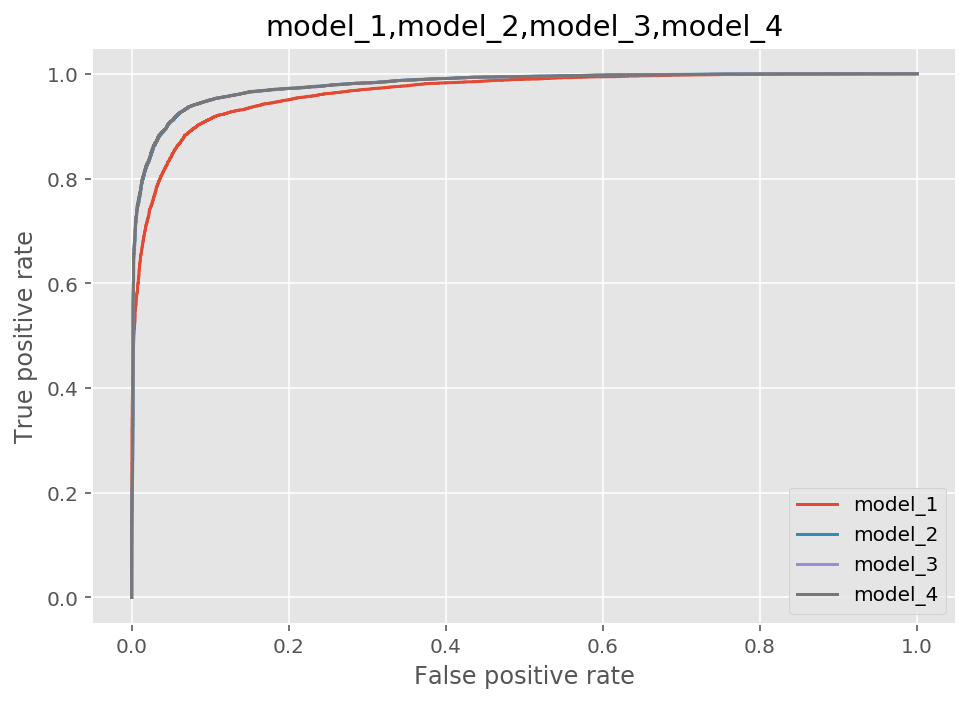

In [158]:
roc_curv_four(log_list[0],log_list[1],log_list[2],log_list[3],X_test,y_test)
#best model is c=100

### Naive Bayes Classifier

In [159]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB()
model_nb, accuracy_nb,tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

Time taken = 0.27628374099731445
Accuracy on the training subset: 0.862
Accuracy on the test subset: 0.862
_____________report________________

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     11869
           1       0.89      0.81      0.85     11193

    accuracy                           0.86     23062
   macro avg       0.86      0.86      0.86     23062
weighted avg       0.86      0.86      0.86     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               10757.0                1112.0 
                satisfied                2078.0                9115.0 


AUC of  model_1: 0.9313850476625404


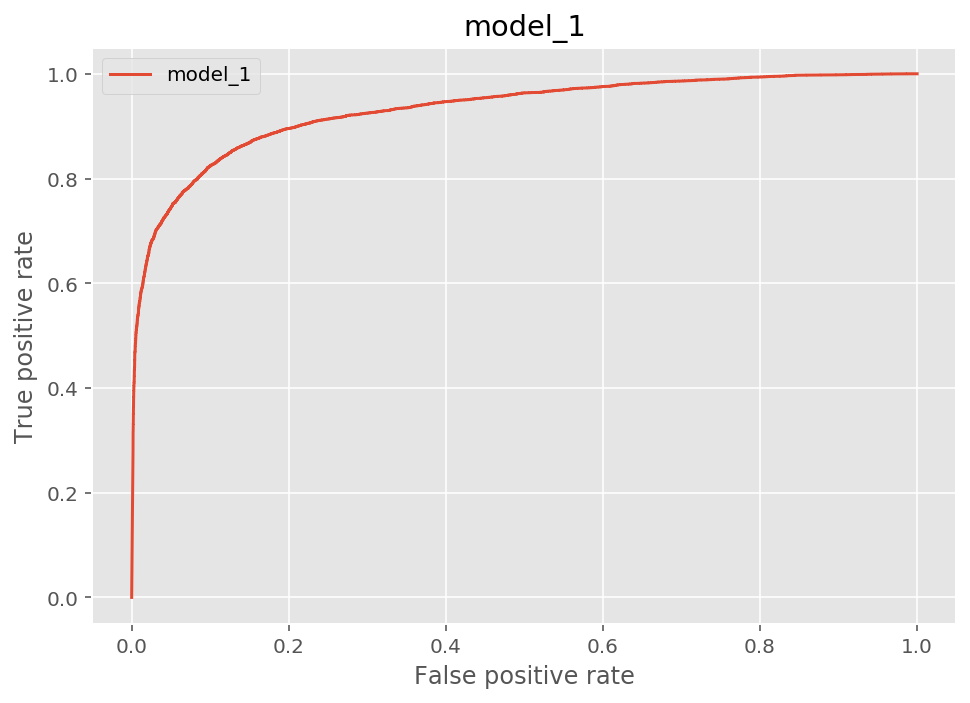

In [160]:
roc_curv_one(model_nb,X_test,y_test)

### Decision Tree Classifier

In [161]:
dt_list=[]
dt_list_accuracy=[]
dt_list_time=[]
for depth in [4,6,8,12]:
    print('model max depth : {:.3f}'.format(depth))
    dt = DecisionTreeClassifier(max_depth=depth)
    dt, accuracy_dt,tt_dt = run_model(dt, X_train, y_train, X_test, y_test)
    dt_list.append(dt)
    dt_list_accuracy.append(accuracy_dt)
    dt_list_time.append(tt_dt)
    print("\n_______________________________________\n")

model max depth : 4.000
Time taken = 0.41585850715637207
Accuracy on the training subset: 0.871
Accuracy on the test subset: 0.868
_____________report________________

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     11869
           1       0.92      0.80      0.86     11193

    accuracy                           0.87     23062
   macro avg       0.87      0.87      0.87     23062
weighted avg       0.87      0.87      0.87     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11044.0                 825.0 
                satisfied                2218.0                8975.0 

_______________________________________

model max depth : 6.000
Time taken = 0.6316170692443848
Accuracy on the training subset: 0.896
Accuracy on the test subset: 0.892
_____________report________________

              precision    recall  

In [162]:
model_dt_no_rest = DecisionTreeClassifier()
model_dt_no_rest, accuracy_model_dt_no_rest ,tt_model_dt_no_rest= run_model(model_dt_no_rest, X_train, y_train, X_test, y_test)

Time taken = 1.2605645656585693
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.942
_____________report________________

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11869
           1       0.94      0.94      0.94     11193

    accuracy                           0.94     23062
   macro avg       0.94      0.94      0.94     23062
weighted avg       0.94      0.94      0.94     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11195.0                 674.0 
                satisfied                 657.0               10536.0 


AUC of  model_1: 0.9234125843113388
AUC of  model_2: 0.9564214728436344
AUC of  model_3: 0.9719301359144032
AUC of  model_4: 0.97745290266595
AUC of  model_5: 0.9422580064660583


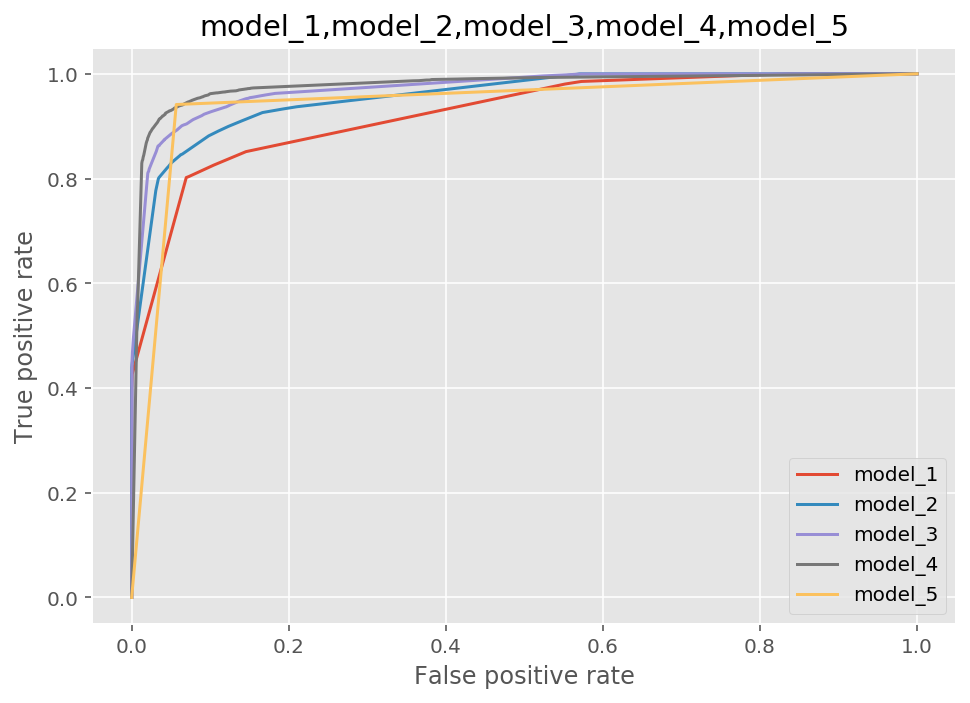

In [64]:
roc_curv_all(dt_list[0],dt_list[1],dt_list[2],dt_list[3],model_dt_no_rest,X_test,y_test)
#best one is max_dep=12

### Random Forest

In [163]:
rf_list=[]
rf_list_accuracy=[]
rf_list_time=[]
for depth in [2,6,8,12]:
    print('model max depth : {:.3f}'.format(depth))
    rf = RandomForestClassifier(max_depth=depth)
    rf, accuracy_rf,tt_rf = run_model(rf, X_train, y_train, X_test, y_test)
    rf_list.append(rf)
    rf_list_accuracy.append(accuracy_rf)
    rf_list_time.append(tt_rf)

    print("\n_______________________________________\n")

model max depth : 2.000
Time taken = 0.3009006977081299
Accuracy on the training subset: 0.851
Accuracy on the test subset: 0.854
_____________report________________

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     11869
           1       0.89      0.80      0.84     11193

    accuracy                           0.85     23062
   macro avg       0.86      0.85      0.85     23062
weighted avg       0.86      0.85      0.85     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               10715.0                1154.0 
                satisfied                2218.0                8975.0 

_______________________________________

model max depth : 6.000
Time taken = 0.6633486747741699
Accuracy on the training subset: 0.904
Accuracy on the test subset: 0.901
_____________report________________

              precision    recall  f

In [164]:
model_rf_no_rest = RandomForestClassifier()
model_rf_no_rest, accuracy_rf_model_rf_no_rest,tt_rf_model_rf_no_rest = run_model(model_rf_no_rest, X_train, y_train, X_test, y_test)

Time taken = 1.4407250881195068
Accuracy on the training subset: 0.997
Accuracy on the test subset: 0.951
_____________report________________

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11869
           1       0.97      0.93      0.95     11193

    accuracy                           0.95     23062
   macro avg       0.95      0.95      0.95     23062
weighted avg       0.95      0.95      0.95     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11513.0                 356.0 
                satisfied                 763.0               10430.0 


AUC of  model_1: 0.921052797575775
AUC of  model_2: 0.9631411371391931
AUC of  model_3: 0.9767041844733474
AUC of  model_4: 0.9847553984627606
AUC of  model_5: 0.9881580967161563


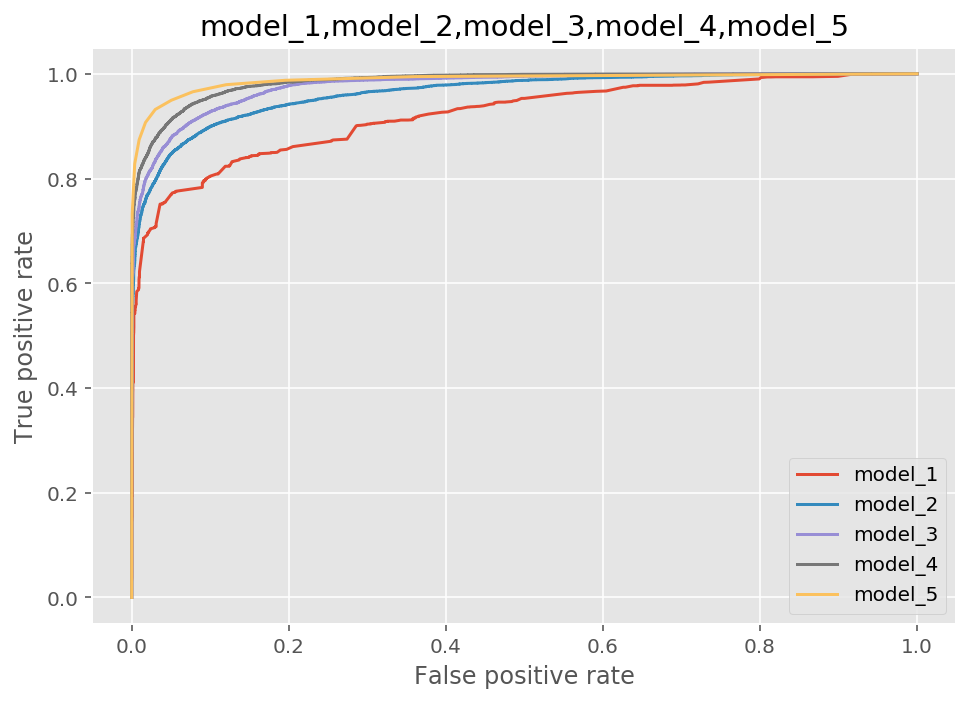

In [165]:
roc_curv_all(rf_list[0],rf_list[1],rf_list[2],rf_list[3],model_rf_no_rest,X_test,y_test)
#best one is max=12

In [68]:
# trees=range(100)
# accuracy=np.zeros(100)

# for i in range(len(trees)):
#     clf = RandomForestClassifier(n_estimators = i+1)
#     model1 = clf.fit(X_train, y_train.ravel())
#     y_predictions = model1.predict(X_test)
#     accuracy[i] = accuracy_score(y_test, y_predictions)

# plt.plot(trees,accuracy)

AUC of  model_1: 0.5010060954815583
AUC of  model_2: 0.9788355514524734
AUC of  model_3: 0.97745290266595
AUC of  model_4: 0.9847553984627606
AUC of  model_5: 0.9313850476625404


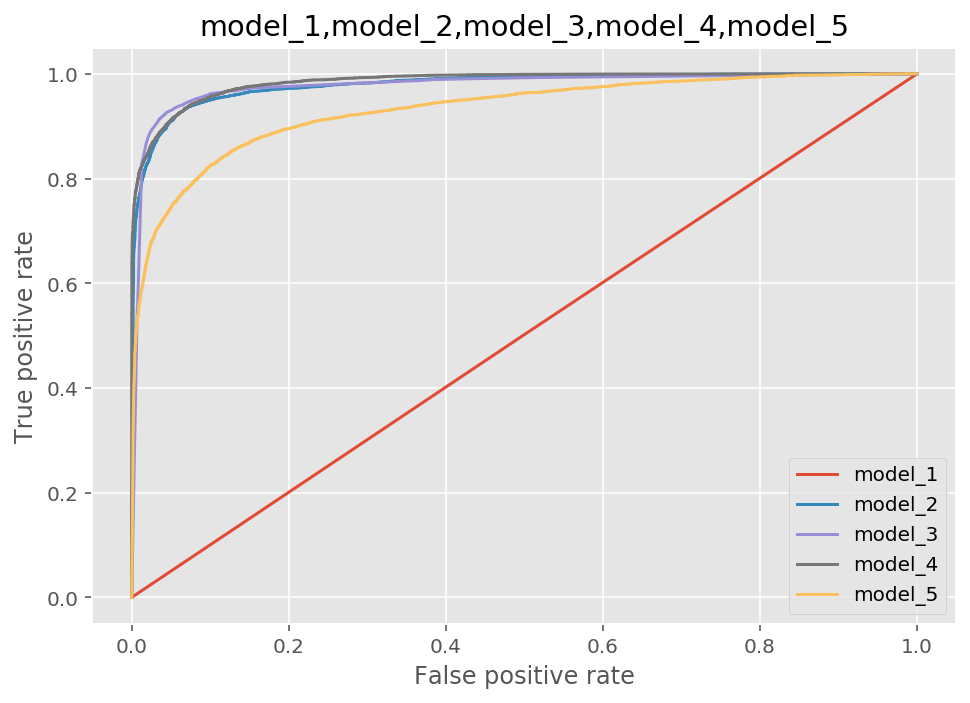

In [167]:
roc_curv_all(dummy_stratified,log_list[2],dt_list[3],rf_list[3],model_nb,X_test,y_test)
#best one is rf

### cross validation

In [168]:
# from sklearn.model_selection import cross_val_score

# clf = RandomForestClassifier(max_depth=8)

# # accuracy is the default scoring metric
# scores = cross_val_score(clf, Data_x, Data_y, cv=5)
# print('Cross-validation (accuracy)', scores)

# # use AUC as scoring metric
# scores_ = cross_val_score(clf, Data_x, Data_y, cv=5, scoring = 'roc_auc')
# print('Cross-validation (AUC)', scores)

# # use recall as scoring metric
# scores = cross_val_score(clf, Data_x, Data_y, cv=5, scoring = 'recall')
# print('Cross-validation (recall)', scores)

In [169]:
# print("Average cross-validation score (recall) : {:.2f}".format(scores_.mean()))

### scaller

In [170]:
model_scaller_standard = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(max_depth=12))
    ])

In [171]:
model_scaller_standard, accuracy_scaller_standard,tt_scaller_standard = run_model(model_scaller_standard, X_train, y_train, X_test, y_test)

Time taken = 1.4392123222351074
Accuracy on the training subset: 0.940
Accuracy on the test subset: 0.930
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11869
           1       0.94      0.91      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11264.0                 605.0 
                satisfied                1012.0               10181.0 


In [172]:
model_scaller_minMax_ = Pipeline([
        ("scaler", preprocessing.MinMaxScaler()),
        ("clf", RandomForestClassifier(max_depth=12))
    ])

In [173]:
model_scaller_minMax, accuracy_scaller_minMax,tt_scaller_minMax = run_model(model_scaller_minMax_, X_train, y_train, X_test, y_test)

Time taken = 1.2066245079040527
Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.930
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11869
           1       0.94      0.91      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11277.0                 592.0 
                satisfied                1026.0               10167.0 


In [174]:
model_scaller_normalize = Pipeline([
        ("scaler",Normalizer()),
        ("clf", RandomForestClassifier(max_depth=12))
    ])

In [175]:
model_scaller_normalize, accuracy_scaller_normalize,tt_scaller_normalize = run_model(model_scaller_normalize, X_train, y_train, X_test, y_test)

Time taken = 2.269259452819824
Accuracy on the training subset: 0.948
Accuracy on the test subset: 0.938
_____________report________________

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11869
           1       0.95      0.92      0.93     11193

    accuracy                           0.94     23062
   macro avg       0.94      0.94      0.94     23062
weighted avg       0.94      0.94      0.94     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11285.0                 584.0 
                satisfied                 854.0               10339.0 


In [176]:
model_scaller_RobustScaler = Pipeline([
        ("scaler",RobustScaler()),
        ("clf", RandomForestClassifier(max_depth=12))
    ])

In [177]:
model_scaller_RobustScaler, accuracy_scaller_RobustScaler,tt_scaller_RobustScaler = run_model(model_scaller_RobustScaler, X_train, y_train, X_test, y_test)

Time taken = 1.3211798667907715
Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.931
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11869
           1       0.95      0.91      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11277.0                 592.0 
                satisfied                1008.0               10185.0 


AUC of  model_1: 0.9847247322325874
AUC of  model_2: 0.983652230888832
AUC of  model_3: 0.9848934002621926
AUC of  model_4: 0.9851113984683912


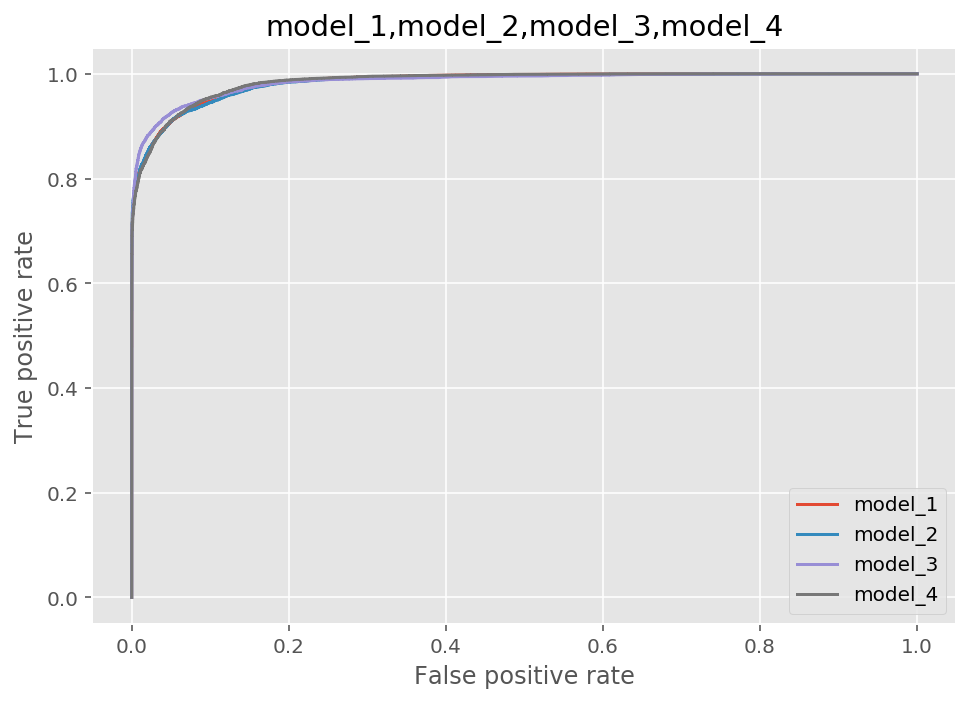

In [178]:
roc_curv_four(model_scaller_standard,model_scaller_minMax,model_scaller_normalize,model_scaller_RobustScaler,X_test,y_test)

AUC of  model_1: 0.9847553984627606
AUC of  model_2: 0.983652230888832


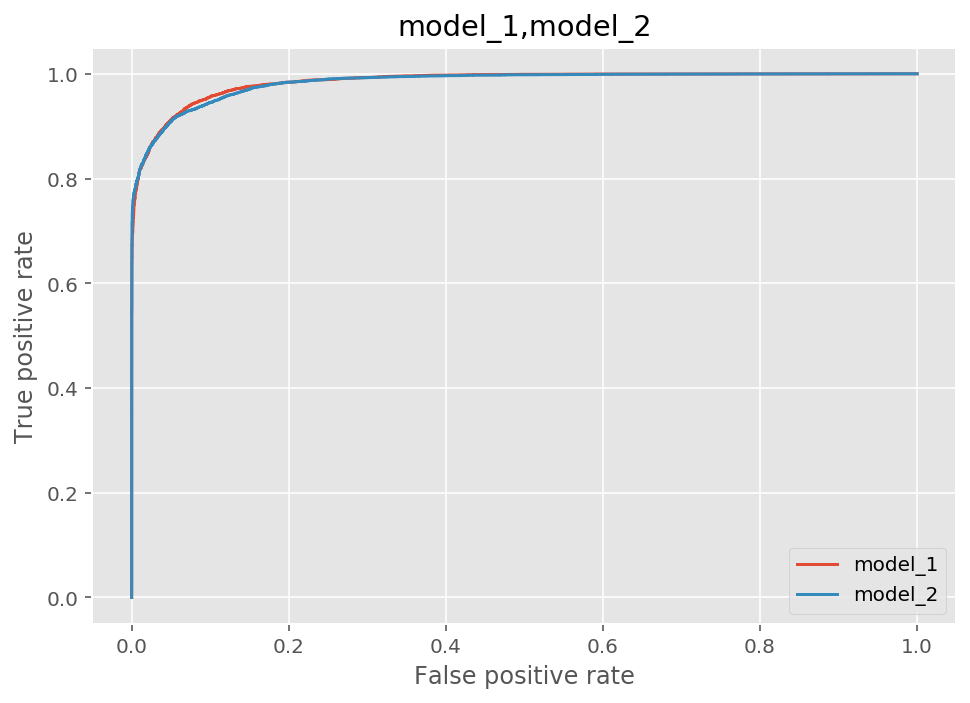

In [179]:
roc_curv_two(rf_list[3],model_scaller_minMax,X_test,y_test)
#best minmax scaller

### feature selection

In [82]:
# features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
#             'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
#             'Inflight_service', 'Baggage_handling']
# target = ['satisfaction']
# X_train_f,y_train_f,X_test_f,y_test_f=split_test_train_specific_feature(features=features,target=target,data_train=train,data_test=test)
# #params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}
# model_lr = RandomForestClassifier()
# model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(best_model, X_train_f, y_train_f, X_test_f, y_test_f)

In [180]:
def selectPercentile(X_train,y_train,X_test):
    select = SelectPercentile(percentile=50)
    select.fit(X_train, y_train)
    X_train_f= select.transform(X_train)
    X_test_f= select.transform(X_test)
    support = select.get_support()
    features = X_train.loc[:,support].columns.tolist()
    print("features : {}\n".format(features))
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_selected.shape: {}".format(X_train_f.shape))
    print("_________________________________\n")
    print("X_test.shape: {}".format(X_train.shape))
    print("X_test_selected.shape: {}".format(X_test_f.shape))
    return X_train_f,X_test_f,features

In [181]:
 X_train_f,X_test_f,features=selectPercentile(X_train,y_train,X_test)

features : ['Leg_room_service_1', 'Leg_room_service_3', 'Leg_room_service_4', 'Leg_room_service_5', 'Online_boarding_1', 'Online_boarding_2', 'Online_boarding_3', 'Online_boarding_4', 'Online_boarding_5', 'Class_Eco', 'Food_and_drink_1', 'Inflight_wifi_service_2', 'Inflight_wifi_service_3', 'Inflight_wifi_service_4', 'Inflight_wifi_service_5', 'Seat_comfort_1', 'Seat_comfort_2', 'Seat_comfort_3', 'Seat_comfort_4', 'Seat_comfort_5', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Baggage_handling_3', 'Baggage_handling_5', 'Ease_of_Online_booking_5', 'Inflight_service_3', 'Inflight_service_5', 'On-board_service_1', 'On-board_service_5', 'Checkin_service_5', 'Inflight_entertainment_1', 'Inflight_entertainment_2', 'Inflight_entertainment_3', 'Inflight_entertainment_4', 'Inflight_entertainment_5', 'Cleanliness_1', 'Cleanliness_2', 'Cleanliness_5', 'Flight_Distance']

X_train.shape: (92245, 78)
X_train_selected.shape: (92245, 39)
_________________________________

X_tes

In [182]:
model_RFC_selectPercentile = RandomForestClassifier(max_depth=12)
model_RFC_selectPercentile, accuracy_RFC_selectPercentile,tt_RFC_selectPercentile = run_model(model_RFC_selectPercentile, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.8156800270080566
Accuracy on the training subset: 0.933
Accuracy on the test subset: 0.926
_____________report________________

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11869
           1       0.95      0.90      0.92     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11310.0                 559.0 
                satisfied                1145.0               10048.0 


In [183]:
model_dt_selectPercentile = DecisionTreeClassifier(max_depth=12)
model_dt_selectPercentile, accuracy_dt_selectPercentile,tt_dt_selectPercentile = run_model(model_dt_selectPercentile, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.4210813045501709
Accuracy on the training subset: 0.943
Accuracy on the test subset: 0.934
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11869
           1       0.95      0.91      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.94      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11319.0                 550.0 
                satisfied                 964.0               10229.0 


In [184]:
model_lr_selectPercentile=LogisticRegression(C=100)
model_lr_selectPercentile, accuracy_lr_selectPercentile, tt_lr_selectPercentile = run_model(model_lr_selectPercentile, X_train_f, y_train, X_test_f, y_test)

Time taken = 1.0239264965057373
Accuracy on the training subset: 0.918
Accuracy on the test subset: 0.916
_____________report________________

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     11869
           1       0.92      0.91      0.91     11193

    accuracy                           0.92     23062
   macro avg       0.92      0.92      0.92     23062
weighted avg       0.92      0.92      0.92     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               10975.0                 894.0 
                satisfied                1047.0               10146.0 


AUC of  model_1: 0.9810550029248463
AUC of  model_2: 0.9774113067926218
AUC of  model_3: 0.9683121793929002


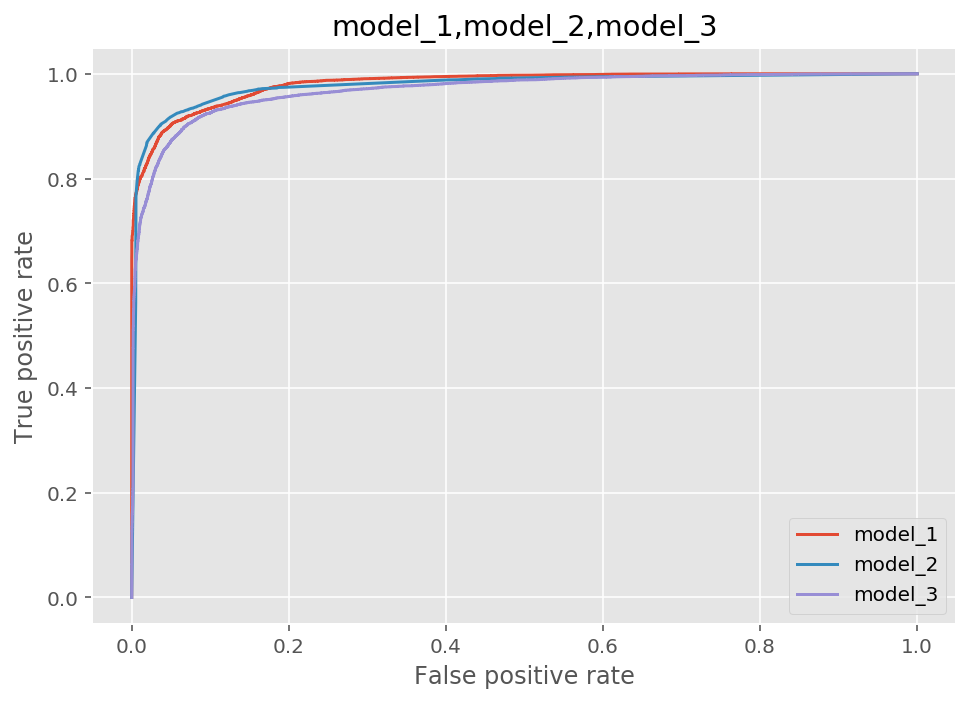

In [185]:
roc_curv_three(model_RFC_selectPercentile,model_dt_selectPercentile,model_lr_selectPercentile,X_test_f,y_test)

In [186]:
def selectKBest(X_train,y_train,X_test):
    selector = SelectKBest(chi2, k=39)
    selector.fit(X_train, y_train)
    X_train_f = selector.transform(X_train)
    X_test_f = selector.transform(X_test)
    support = selector.get_support()
    features = X_train.loc[:,support].columns.tolist()
    print("features : {}\n".format(features))
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_f.shape: {}".format(X_train_f.shape))
    print("_____________________________\n")
    print("X_test.shape: {}".format(X_test.shape))
    print("X_test_f.shape: {}".format(X_test_f.shape))
    return X_train_f,X_test_f,features
    #print(X.columns[selector.get_support(indices=True)])

In [187]:
X_train_f,X_test_f,features=selectKBest(X_train,y_train,X_test)

features : ['Leg_room_service_1', 'Leg_room_service_3', 'Leg_room_service_4', 'Leg_room_service_5', 'Online_boarding_1', 'Online_boarding_2', 'Online_boarding_3', 'Online_boarding_4', 'Online_boarding_5', 'Class_Eco', 'Food_and_drink_1', 'Inflight_wifi_service_2', 'Inflight_wifi_service_3', 'Inflight_wifi_service_4', 'Inflight_wifi_service_5', 'Seat_comfort_1', 'Seat_comfort_2', 'Seat_comfort_3', 'Seat_comfort_5', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Baggage_handling_3', 'Baggage_handling_5', 'Ease_of_Online_booking_5', 'Inflight_service_3', 'Inflight_service_5', 'On-board_service_1', 'On-board_service_2', 'On-board_service_5', 'Checkin_service_1', 'Checkin_service_5', 'Inflight_entertainment_1', 'Inflight_entertainment_2', 'Inflight_entertainment_3', 'Inflight_entertainment_4', 'Inflight_entertainment_5', 'Cleanliness_1', 'Cleanliness_2', 'Cleanliness_5']

X_train.shape: (92245, 78)
X_train_f.shape: (92245, 39)
_____________________________

X_test.sha

In [188]:
model_RFC_selectKBest = RandomForestClassifier(max_depth=12)
model_RFC_selectKBest, accuracy_RFC_selectKBest, tt_RFC_selectKBest = run_model(model_RFC_selectKBest, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.6993672847747803
Accuracy on the training subset: 0.936
Accuracy on the test subset: 0.930
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11869
           1       0.94      0.91      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11270.0                 599.0 
                satisfied                1018.0               10175.0 


In [189]:
model_dt_selectKBest = DecisionTreeClassifier(max_depth=12)
model_dt_selectKBest, accuracy_dt_selectKBest,tt_selectKBest = run_model(model_dt_selectKBest, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.3474280834197998
Accuracy on the training subset: 0.940
Accuracy on the test subset: 0.933
_____________report________________

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11869
           1       0.94      0.92      0.93     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11252.0                 617.0 
                satisfied                 933.0               10260.0 


In [190]:
model_lr_selectKBest=LogisticRegression(C=100)
model_lr_selectKBest, accuracy_lr_selectKBest, tt_lr_selectKBest = run_model(model_lr_selectKBest, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.8554353713989258
Accuracy on the training subset: 0.919
Accuracy on the test subset: 0.916
_____________report________________

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11869
           1       0.92      0.91      0.91     11193

    accuracy                           0.92     23062
   macro avg       0.92      0.92      0.92     23062
weighted avg       0.92      0.92      0.92     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               10994.0                 875.0 
                satisfied                1056.0               10137.0 


AUC of  model_1: 0.982400180799783
AUC of  model_2: 0.9775946944621643
AUC of  model_3: 0.9683967787451139


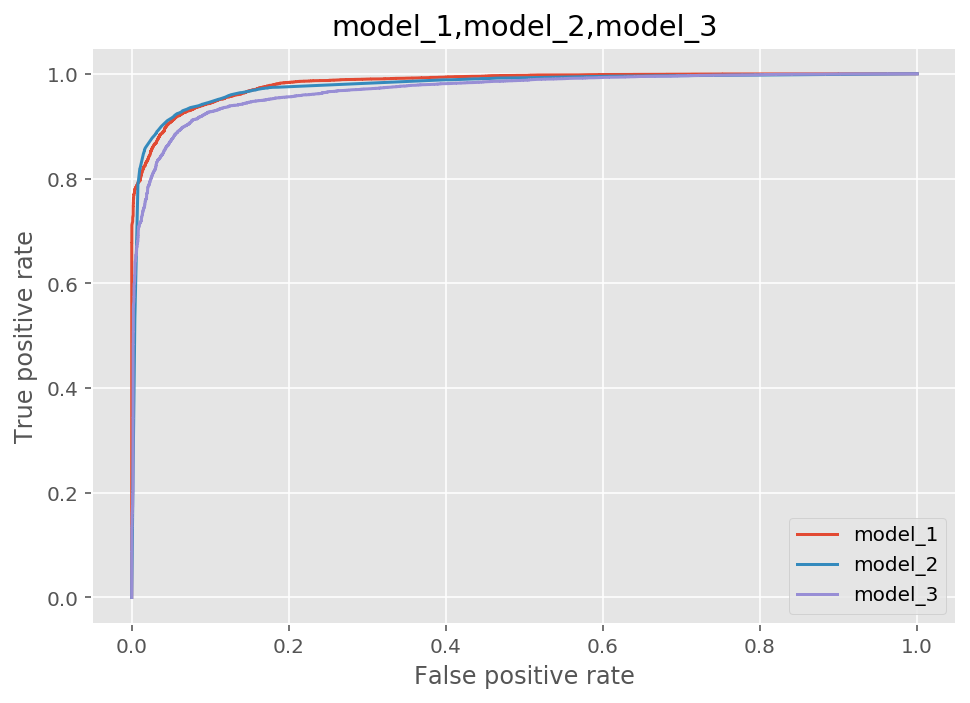

In [191]:
roc_curv_three(model_RFC_selectKBest,model_dt_selectKBest,model_lr_selectKBest,X_test_f,y_test)

In [192]:
def selectFromModel(X_train,y_train,X_test):
    selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0),threshold="median")
    selector.fit(X_train, y_train)
    support = selector.get_support()
    features = X_train.loc[:,support].columns.tolist()
    X_train_f=selector.transform(X_train)
    X_test_f=selector.transform(X_test)
    print("features : {}\n".format(features))
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_f.shape: {}".format(X_train_f.shape))
    print("_____________________________\n")
    print("X_test.shape: {}".format(X_test.shape))
    print("X_test_f.shape: {}".format(X_test_f.shape))
    return X_train_f,X_test_f,features

In [193]:
 X_train_f,X_test_f,features=selectFromModel(X_train,y_train,X_test)

features : ['Leg_room_service_4', 'Leg_room_service_5', 'Online_boarding_1', 'Online_boarding_2', 'Online_boarding_3', 'Online_boarding_4', 'Online_boarding_5', 'Class_Eco', 'Gate_location_3', 'Inflight_wifi_service_1', 'Inflight_wifi_service_2', 'Inflight_wifi_service_3', 'Inflight_wifi_service_4', 'Inflight_wifi_service_5', 'Seat_comfort_3', 'Seat_comfort_5', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Baggage_handling_3', 'Baggage_handling_5', 'Ease_of_Online_booking_2', 'Ease_of_Online_booking_3', 'Ease_of_Online_booking_5', 'Inflight_service_3', 'Inflight_service_5', 'On-board_service_4', 'On-board_service_5', 'Checkin_service_5', 'Inflight_entertainment_1', 'Inflight_entertainment_2', 'Inflight_entertainment_4', 'Inflight_entertainment_5', 'Cleanliness_1', 'Cleanliness_2', 'Cleanliness_5', 'Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

X_train.shape: (92245, 78)
X_train_f.shape: (92245, 39)
__________________________

In [194]:
model_RFC_selectFromModel = RandomForestClassifier(max_depth=12)
model_RFC_selectFromModel, accuracy_RFC_selectFromModel,tt_RFC_selectFromModel = run_model(model_RFC_selectFromModel, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.8561019897460938
Accuracy on the training subset: 0.945
Accuracy on the test subset: 0.937
_____________report________________

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11869
           1       0.94      0.92      0.93     11193

    accuracy                           0.94     23062
   macro avg       0.94      0.94      0.94     23062
weighted avg       0.94      0.94      0.94     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11255.0                 614.0 
                satisfied                 849.0               10344.0 


In [195]:
model_dt_selectFromModel = DecisionTreeClassifier(max_depth=12)
model_dt_selectFromModel, accuracy_dt_selectFromModel,tt_dt_selectFromModel = run_model(model_dt_selectFromModel, X_train_f, y_train, X_test_f, y_test)

Time taken = 0.46939897537231445
Accuracy on the training subset: 0.950
Accuracy on the test subset: 0.938
_____________report________________

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11869
           1       0.95      0.92      0.94     11193

    accuracy                           0.94     23062
   macro avg       0.94      0.94      0.94     23062
weighted avg       0.94      0.94      0.94     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11311.0                 558.0 
                satisfied                 871.0               10322.0 


In [196]:
model_lr_selectFromModel=LogisticRegression(C=100)
model_lr_selectFromModel, accuracy_lr_selectFromModel,tt_lr_selectFromModel = run_model(model_lr_selectFromModel, X_train_f, y_train, X_test_f, y_test)

Time taken = 2.365004539489746
Accuracy on the training subset: 0.930
Accuracy on the test subset: 0.927
_____________report________________

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11869
           1       0.93      0.92      0.92     11193

    accuracy                           0.93     23062
   macro avg       0.93      0.93      0.93     23062
weighted avg       0.93      0.93      0.93     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11093.0                 776.0 
                satisfied                 898.0               10295.0 


AUC of  model_1: 0.9865936259390001
AUC of  model_2: 0.9782774584307169
AUC of  model_3: 0.9754638017030929


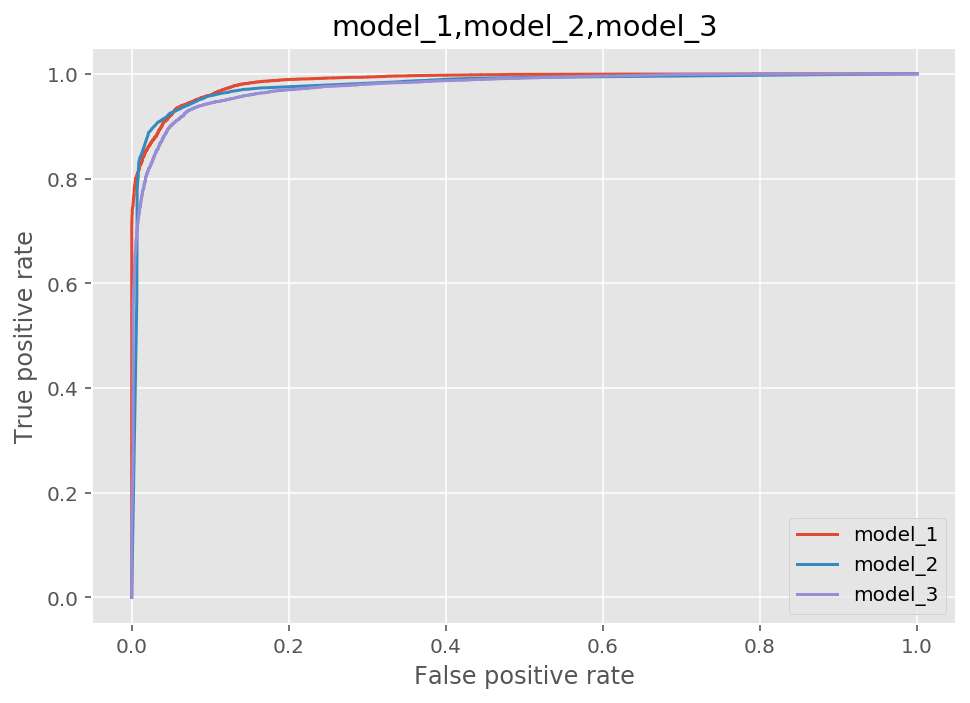

In [197]:
roc_curv_three(model_RFC_selectFromModel,model_dt_selectFromModel,model_lr_selectFromModel,X_test_f,y_test)

## pca

### reduce dimentions

In [101]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(projected.shape)

(92245, 78)
(92245, 2)


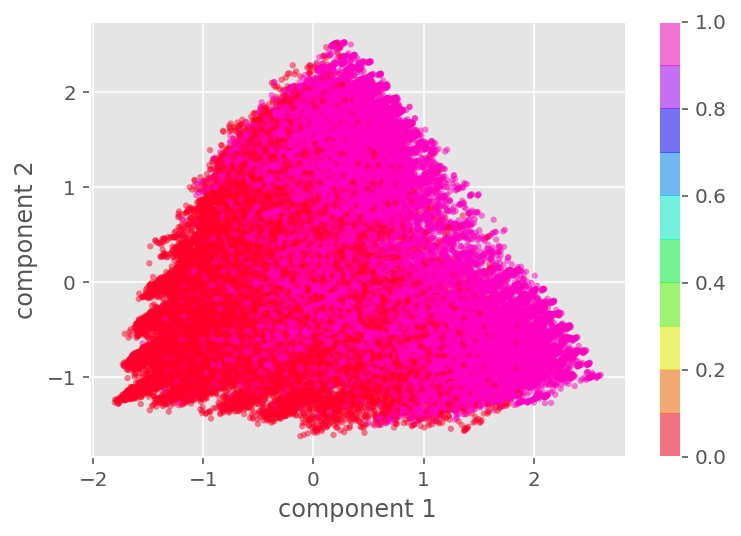

In [102]:
plt.scatter(projected[:, 0], projected[:, 1],
            s=10,
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Choosing the number of components

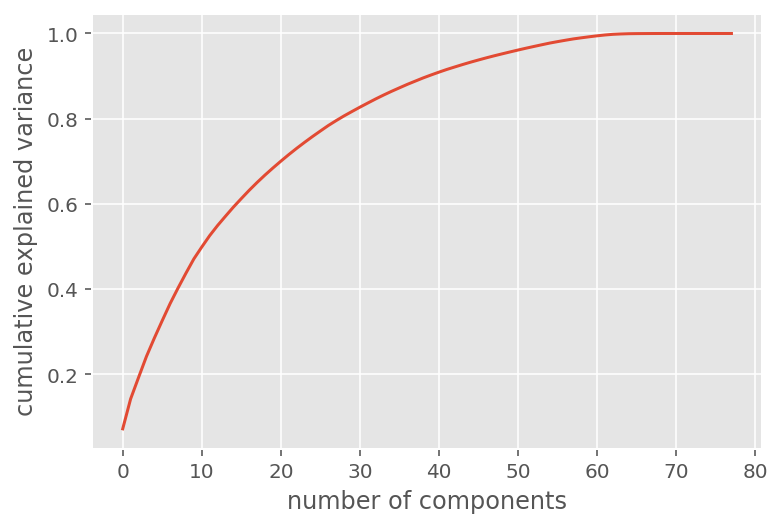

In [103]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### pca model

In [200]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
pca = PCA(n_components=62)
pca_X_train=pca.fit_transform(X_train)
pca_X_test=pca.transform(X_test)
model_pca=Pipeline([
        #("Pca", pca),
        ("rf", RandomForestClassifier(max_depth=12))
    ])
#param_grid = {'rf__max_depth': [12],}
#grid = GridSearchCV(model, param_grid, cv=7)
model_rf_pca, accuracy_rf_pca,tt_rf_pca = run_model(model_pca, pca_X_train, y_train, pca_X_test, y_test)

Time taken = 6.7609031200408936
Accuracy on the training subset: 0.937
Accuracy on the test subset: 0.910
_____________report________________

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11869
           1       0.93      0.88      0.90     11193

    accuracy                           0.91     23062
   macro avg       0.91      0.91      0.91     23062
weighted avg       0.91      0.91      0.91     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11176.0                 693.0 
                satisfied                1376.0                9817.0 


AUC of  model_1: 0.9683303126644974


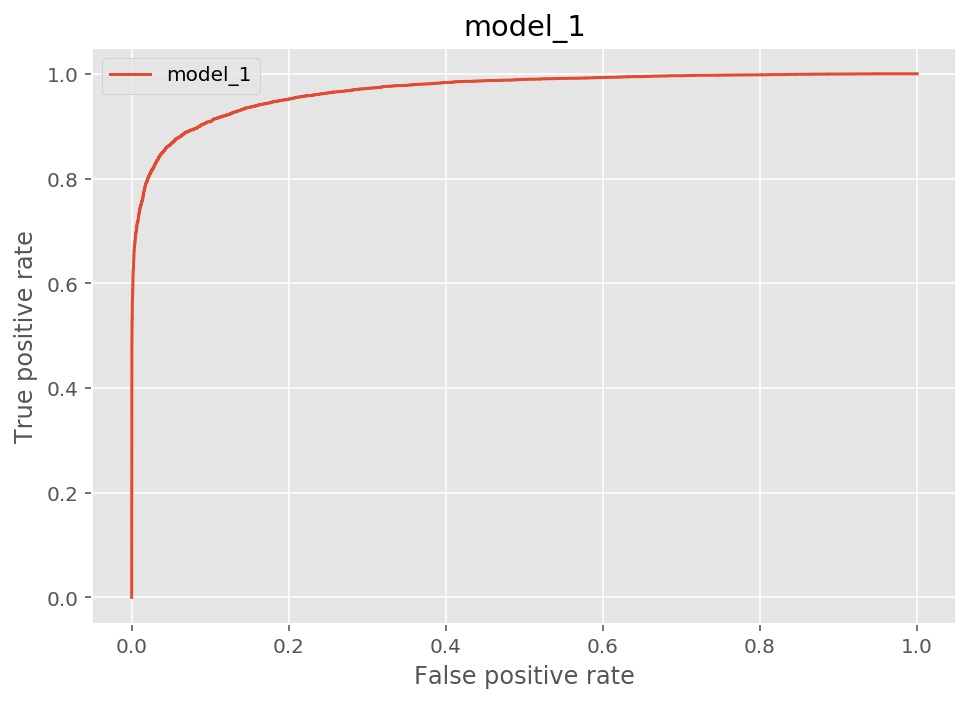

In [201]:
roc_curv_one(model_rf_pca,pca_X_test,y_test)

### label_encoder

In [107]:
airline_dataset_cleaned_label=airline_dataset_cleaned.copy()
airline_dataset_cleaned_label=label_encoder(airline_dataset_cleaned_label)
X_train_l,y_train_l,X_test_l,y_test_l=split_fill_null(airline_dataset_cleaned_label)

In [108]:
X_train_l,X_test_l=minMaxScaller(X_train_l,X_test_l)

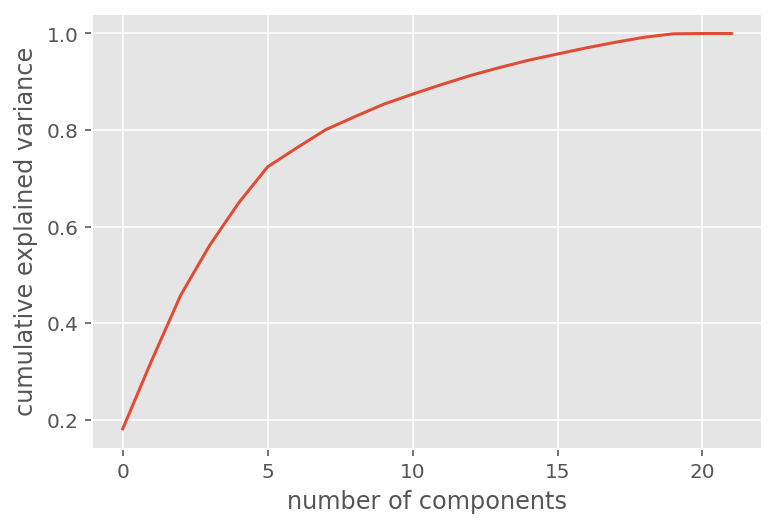

In [109]:
pca = PCA().fit(X_train_l)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [110]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
pca = PCA(n_components=20)
rf=RandomForestClassifier()
model=Pipeline([
        ("Pca", pca),
        ("rf", RandomForestClassifier())
    ])
param_grid = {'rf__max_depth': [12],}
grid = GridSearchCV(model, param_grid, cv=7)

model_rf_pca, accuracy_rf_pca,tt_rf_pca = run_model(grid, X_train_l, y_train_l, X_test_l, y_test_l)

Time taken = 29.460392236709595
Accuracy on the training subset: 0.943
Accuracy on the test subset: 1.000
_____________report________________

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11869
           1       0.94      0.89      0.91     11193

    accuracy                           0.92     23062
   macro avg       0.92      0.92      0.92     23062
weighted avg       0.92      0.92      0.92     23062

_____________ confusion_matrix________________

                          disatified_or_natural             satisfied 
    disatified_or_natural               11271.0                 598.0 
                satisfied                1268.0                9925.0 


AUC of  model_1: 0.9740215592630882


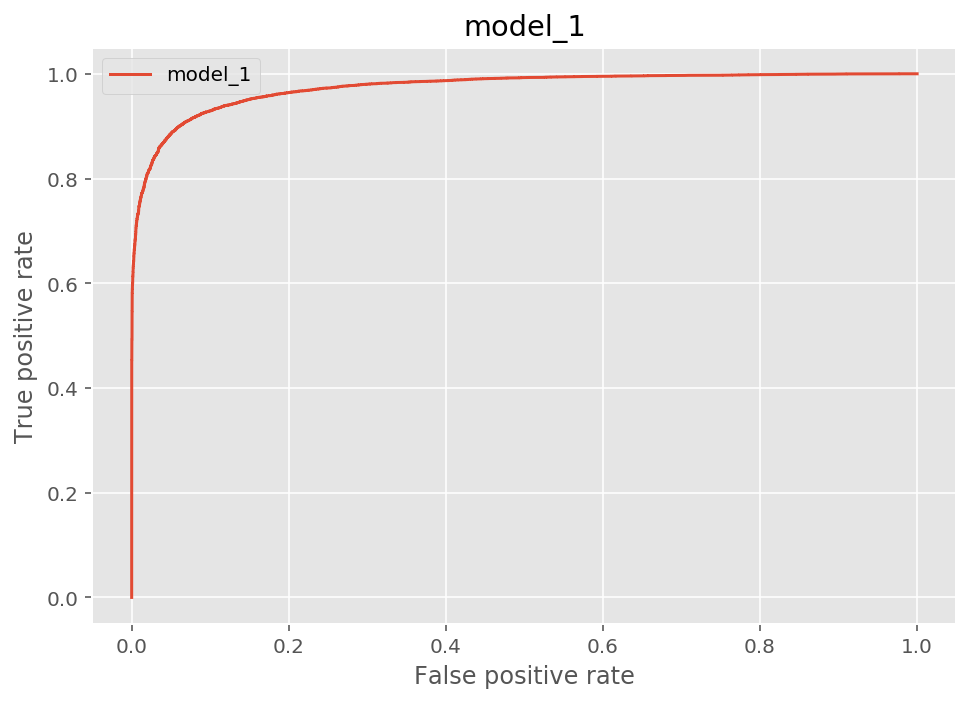

In [111]:
roc_curv_one(model_rf_pca,X_test_l,y_test_l)

### clustering

In [1]:
%matplotlib inline
from time import sleep
from IPython.display import display, clear_output
import matplotlib as mpl
import matplotlib.animation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import lines
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [28]:
df=airline_dataset.copy()
drop_cols = ["Unnamed: 0" , "id"]
num_cols = ["Age" , "Flight Distance" ,"Departure Delay in Minutes" , "Arrival Delay in Minutes"]
y_col = "satisfaction"
cat_cols = list(set(df.columns).difference(set(drop_cols+num_cols)))

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first")
cat_df = pd.DataFrame(ohe.fit_transform(df[cat_cols]).todense() , columns=ohe.get_feature_names(cat_cols))

In [30]:
# ohe = OneHotEncoder(drop="first")
# cat_df = pd.DataFrame(ohe.fit_transform(df[cat_cols]).todense() , columns=ohe.get_feature_names(cat_cols))
#cat_df

In [52]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
num_df = pd.DataFrame(mms.fit_transform(df[num_cols]) , columns=num_cols)

In [33]:
X = cat_df.join(num_df)
y = df[y_col]

In [34]:
X = X.fillna(X.mean())

In [35]:
X_train , X_test , y_train  ,y_test = train_test_split(X,y)

In [36]:
kmeans = KMeans(2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
from sklearn.manifold import TSNE

In [38]:
tsne = TSNE(2 , n_iter=250)
transformed_df = tsne.fit_transform(X_train)

In [39]:
from plotnine import *

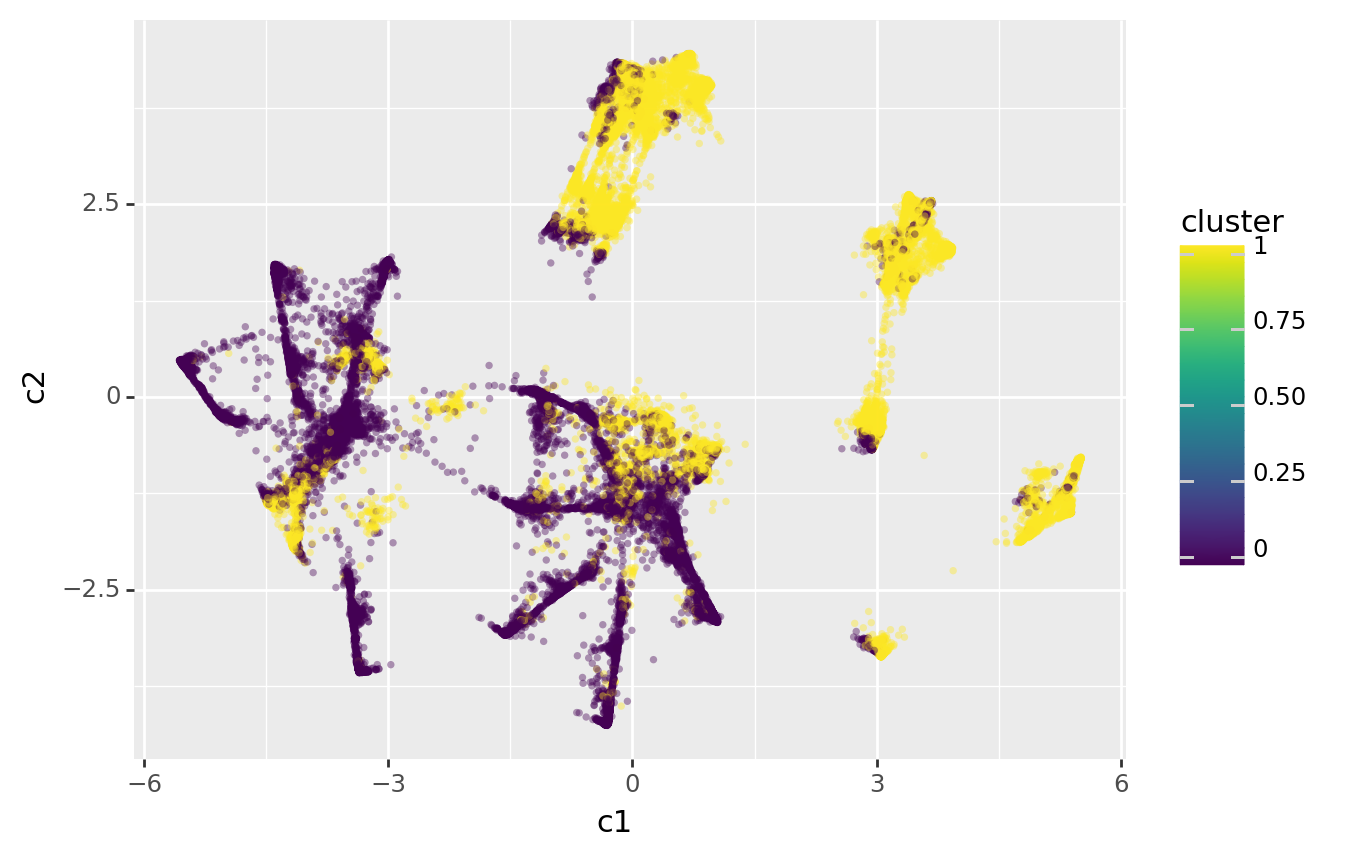

<ggplot: (-9223371927048520620)>

In [40]:
(
    ggplot(pd.DataFrame({"c1" : transformed_df[: , 0]
                        ,"c2" : transformed_df[: , 1]
                        ,"cluster" : kmeans.labels_}) , aes(x="c1" , y="c2" , fill="cluster"))
    + geom_point(alpha=0.4 , stroke=0)
)

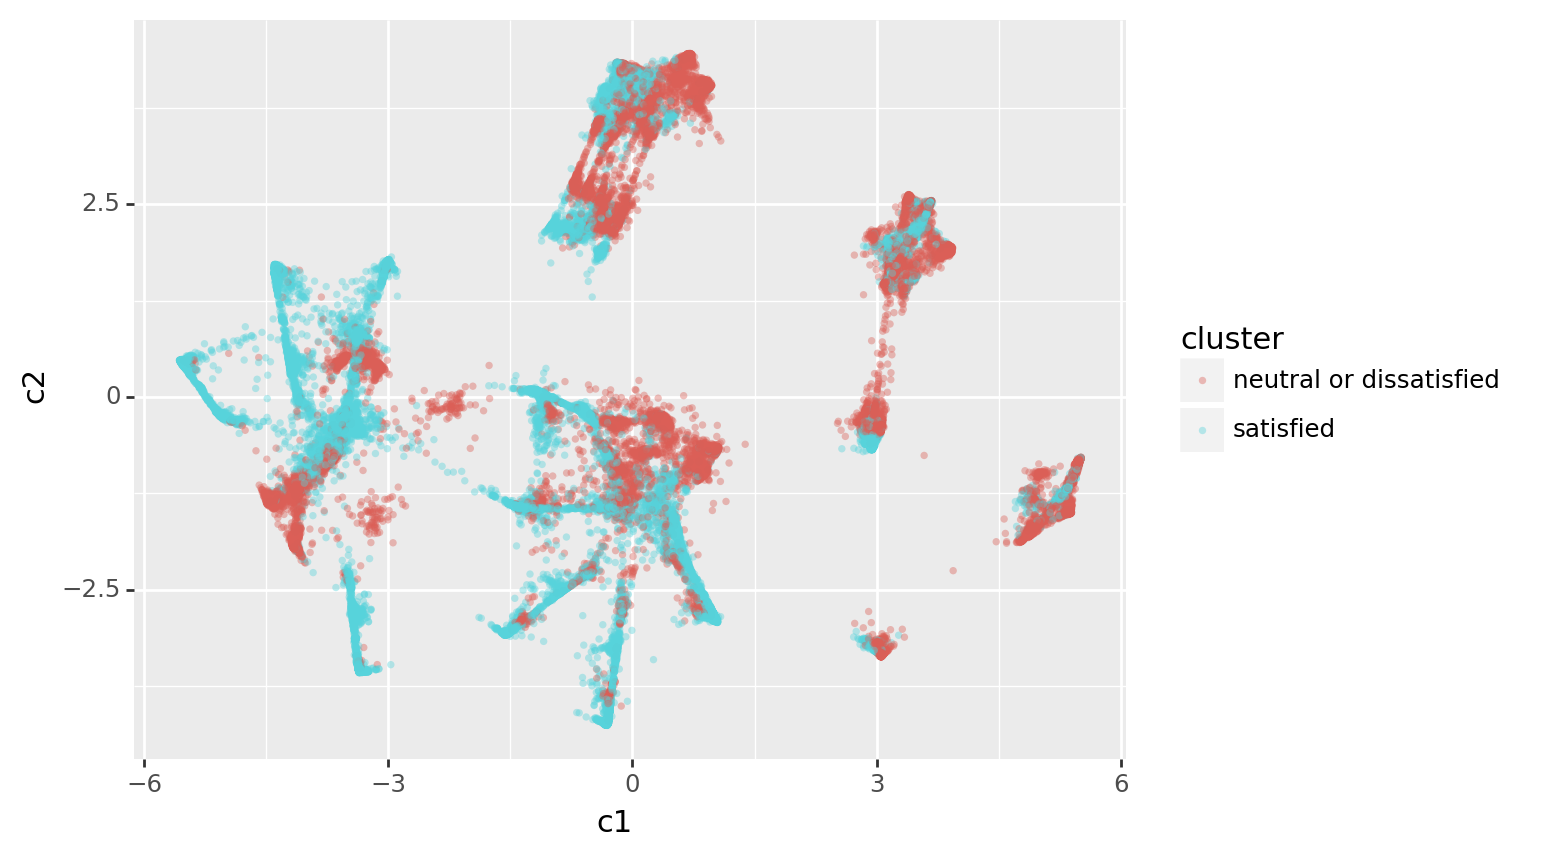

<ggplot: (-9223371927048495148)>

In [41]:
(
    ggplot(pd.DataFrame({"c1" : transformed_df[: , 0]
                        ,"c2" : transformed_df[: , 1]
                        ,"cluster" : y_train}) , aes(x="c1" , y="c2" , fill="cluster"))
    + geom_point(alpha=0.4 , stroke=0)
)

In [42]:
result_df = X_train.copy()
result_df["cluster"] = kmeans.labels_

In [43]:
melt_cluster = result_df.groupby("cluster").mean().reset_index().melt(id_vars="cluster")
#melt_cluster

In [44]:
melt_cluster = melt_cluster["variable"].str.split("_" , expand=True).join(melt_cluster)
melt_cluster = melt_cluster.rename({0 : "variable_base" , 1:"response"} , axis=1)
#melt_cluster

In [45]:
melt_cluster["cluster"] = melt_cluster["cluster"].astype("category")

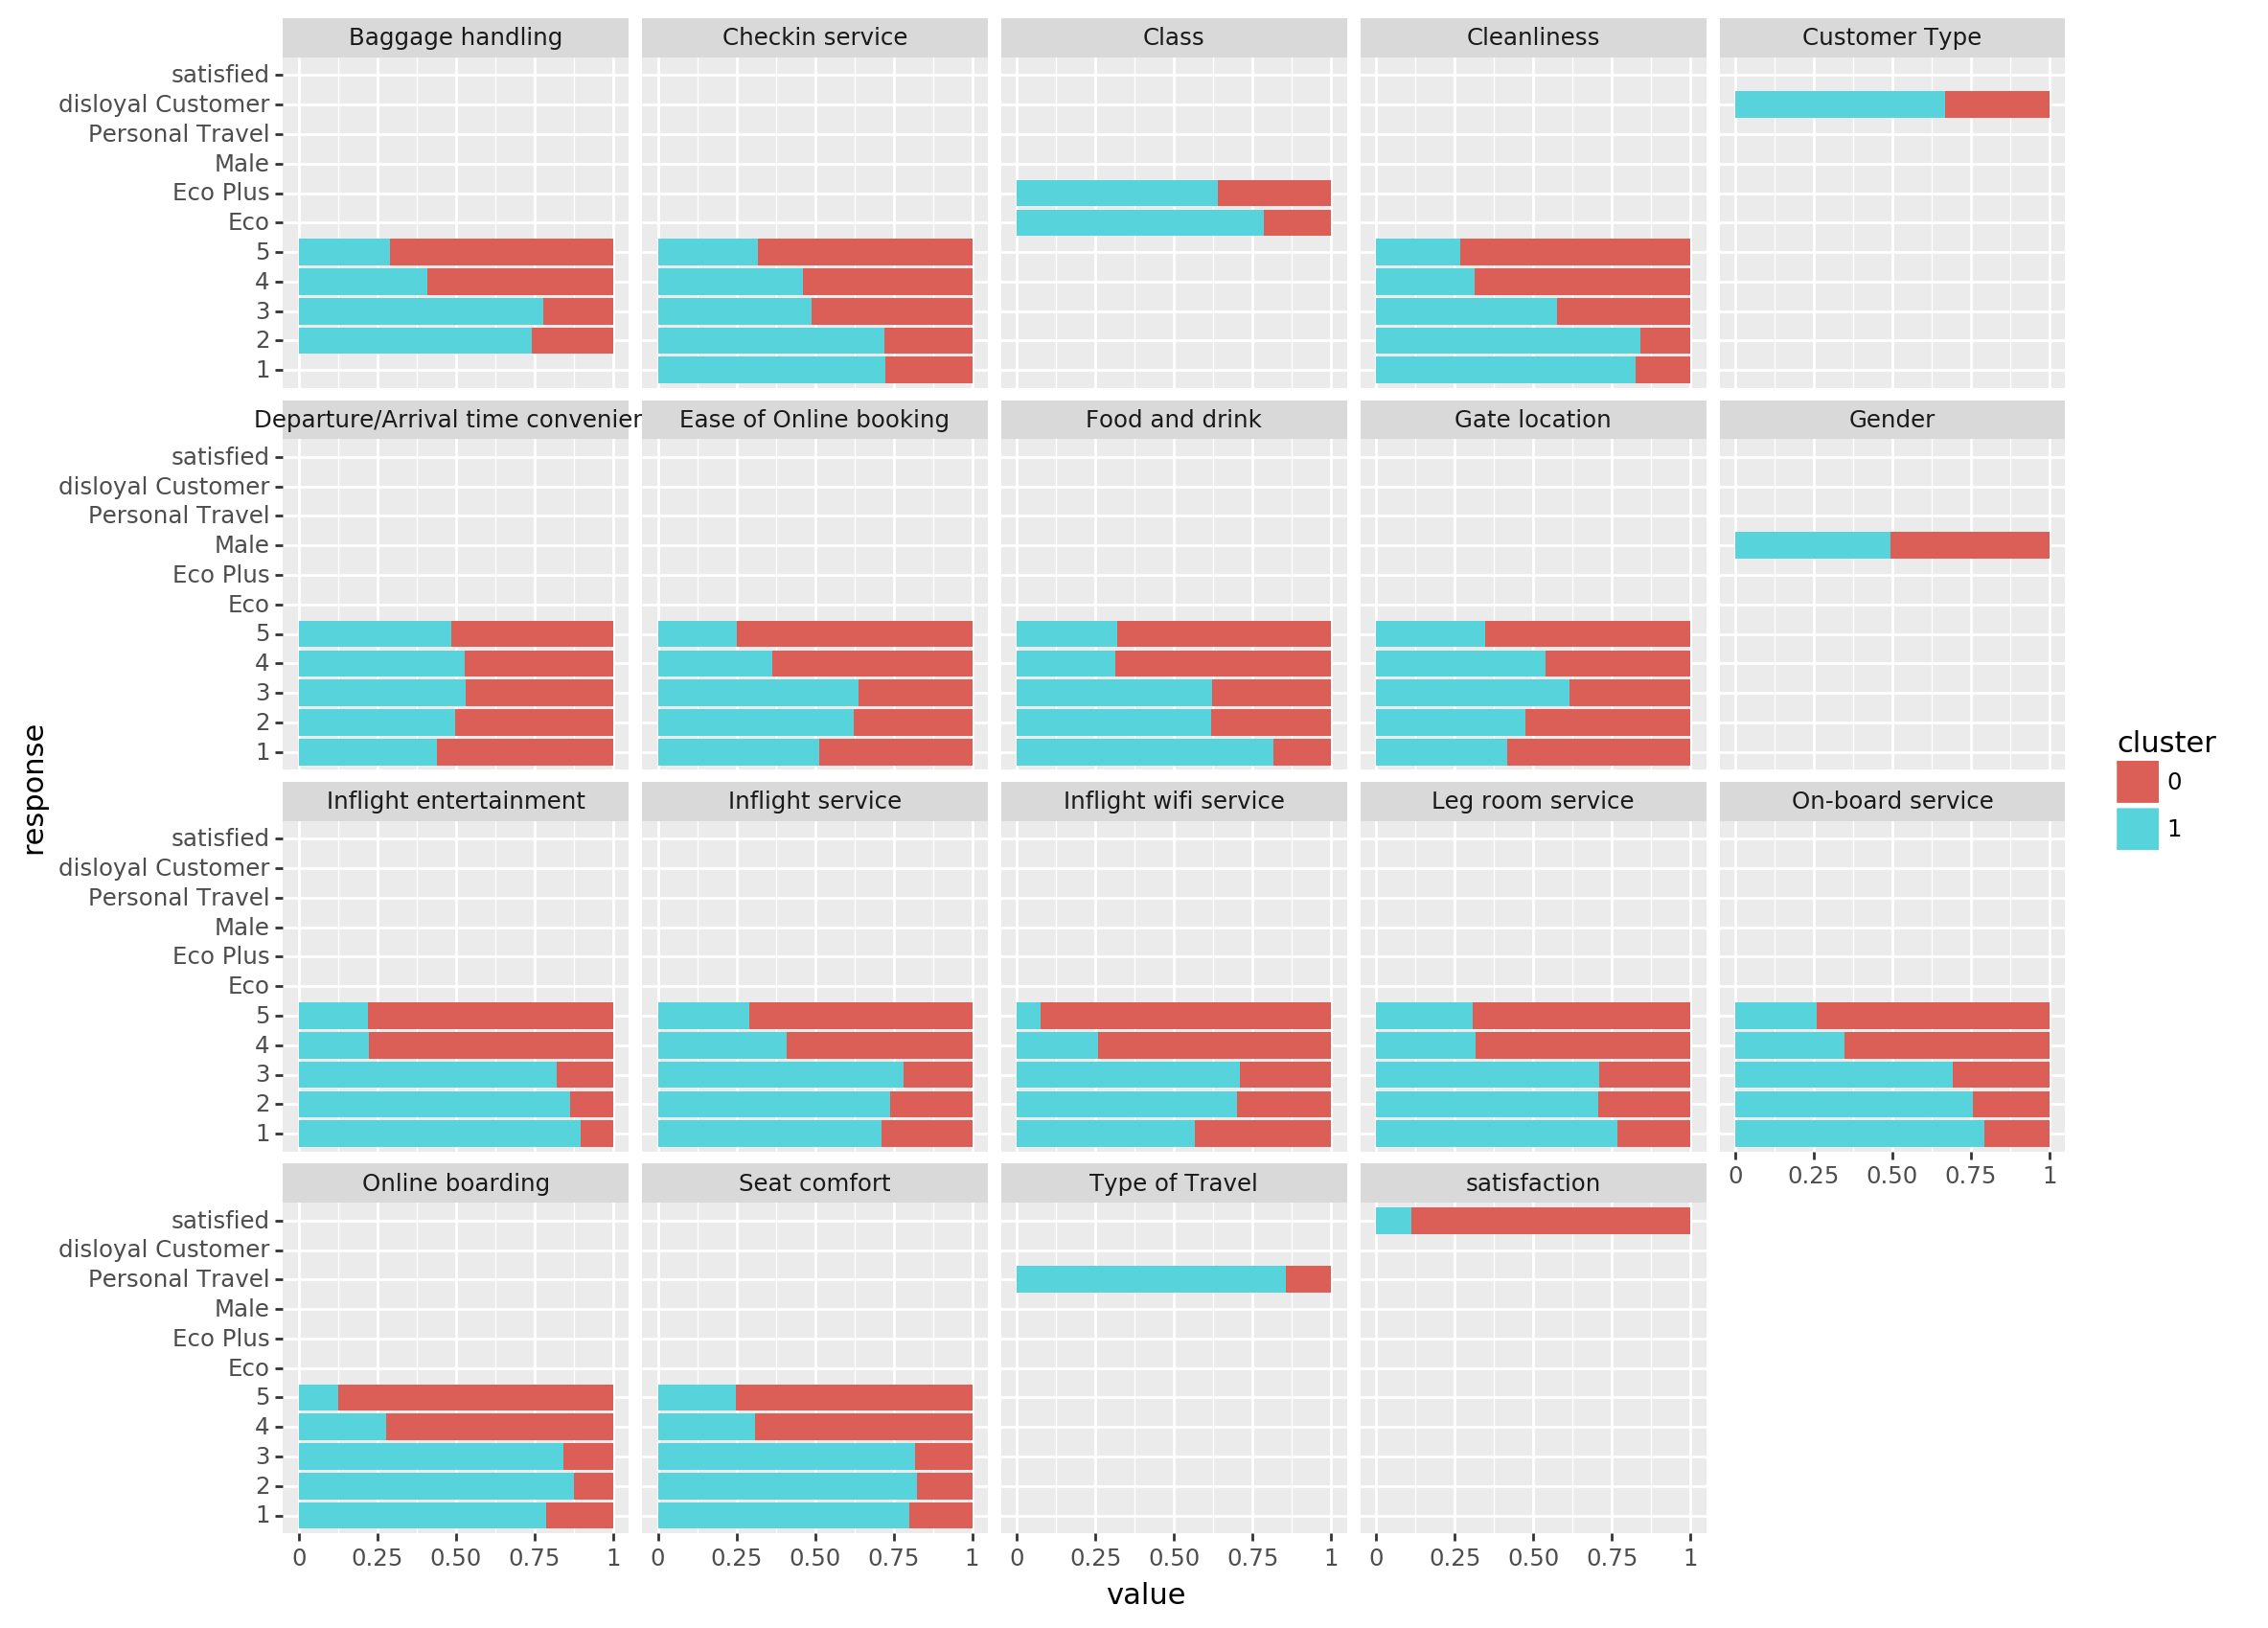

<ggplot: (-9223371927046709636)>

In [46]:
(
    ggplot(melt_cluster[~melt_cluster["response"].isna()],aes(x="response" , y="value" ,fill="cluster"))
    + geom_col(position="fill")
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(12,10))
)

In [47]:
kmeans = KMeans(6)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
def get_melted_clusters(labels):
    result_df = X_train.copy()
    
    result_df[num_cols] = mms.inverse_transform(X_train[num_cols])
    result_df["cluster"] = labels
    melt_cluster = result_df.groupby("cluster").mean().reset_index().melt(id_vars="cluster")
    melt_cluster = melt_cluster["variable"].str.split("_" , expand=True).join(melt_cluster)
    melt_cluster = melt_cluster.rename({0 : "variable_base" , 1:"response"} , axis=1)
    melt_cluster["cluster"] = melt_cluster["cluster"].astype("category") 
    return melt_cluster

In [56]:
mc2 = get_melted_clusters(kmeans.labels_)

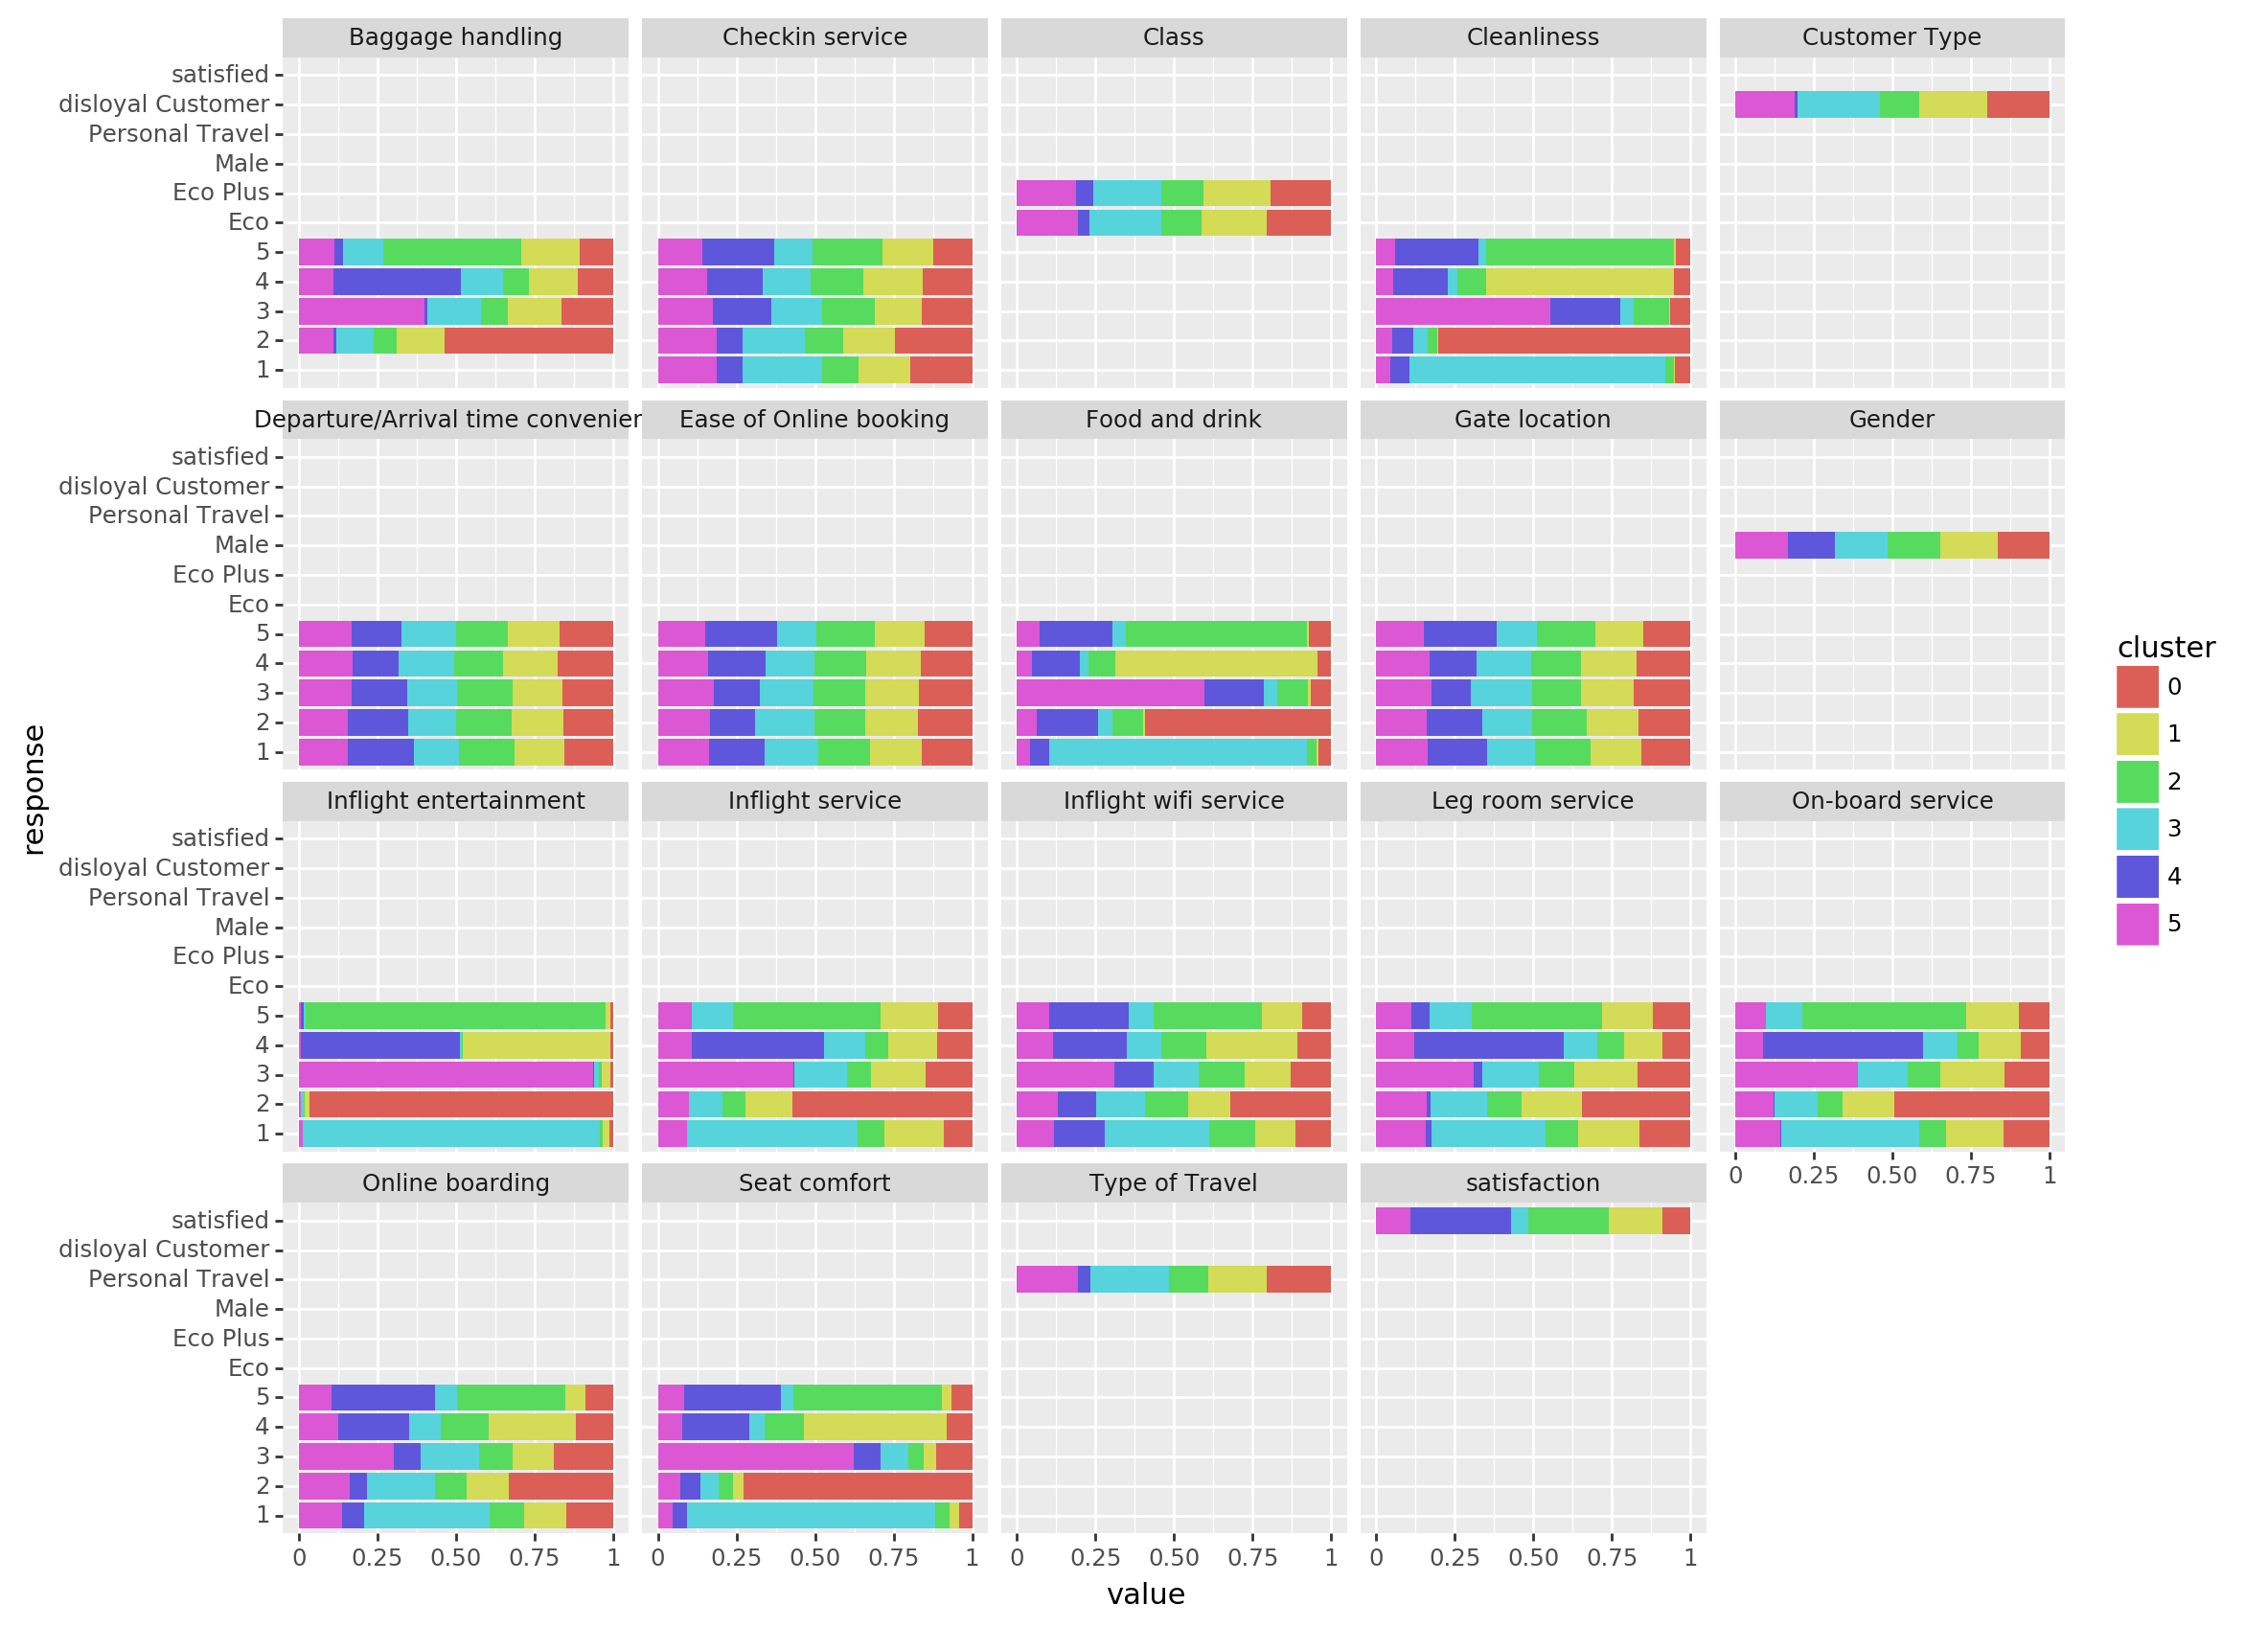

<ggplot: (-9223371927046725924)>

In [57]:
(
    ggplot(mc2[~mc2["response"].isna()],aes(x="response" , y="value" ,fill="cluster"))
    + geom_col(position="fill")
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(12,10))
)

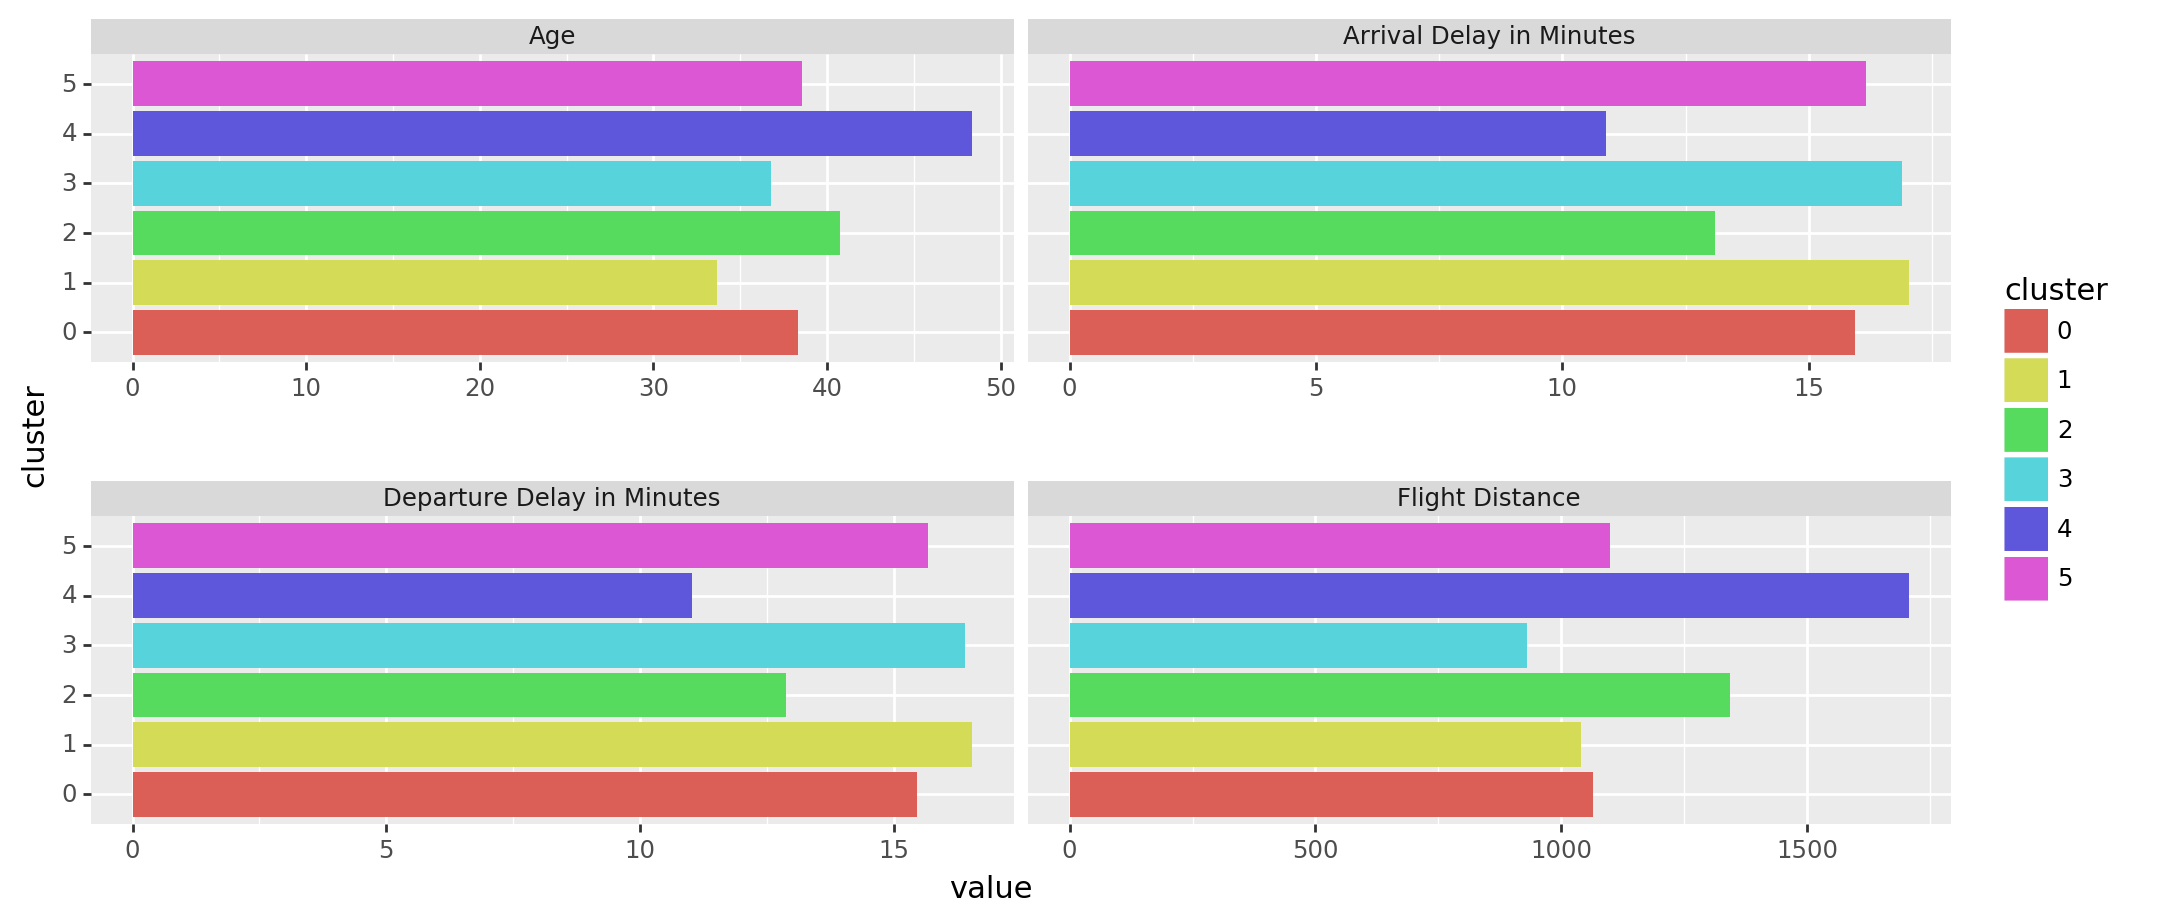

<ggplot: (-9223371927046437320)>

In [58]:
(
    ggplot(mc2[mc2["response"].isna()],aes(x="cluster" , y="value" ,fill="cluster"))
    + geom_col()
    + coord_flip()
    + facet_wrap("~ variable_base" , scales="free_x")
    + theme(figure_size=(12,5),subplots_adjust={'hspace': 0.5})
)